# <a> **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, roc_auc_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

import re
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


%matplotlib inline

> ## Load the data from drive

In [ ]:
%%capture
!gdown --folder https://drive.google.com/drive/folders/1smyA1HcMasGntkDJXVN24roEH9pYkO_T?usp=sharing

# <a> **Important methods**


> This method is used to calculate the number of missing values and the ratio of these values

In [ ]:
def miss_number(df):
  # summary of the number of nulls and count the ratio of missing values
  total_miss = df.isnull().sum()
  percent_miss = (total_miss/df.isnull().count()*100)

  # sort attributes by missing value ratio
  missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
  missing_data = missing_data.sort_values(by='Total missing',ascending=False)

  return missing_data

> This method is to display the data distribution

In [ ]:
def distribution(x):
  plt.figure(figsize=(15,5), facecolor='#FF5A5F')
  sns.set(palette="muted", color_codes=True)
  sns.distplot(x, color = '#0A0F1C')
  plt.show()

> This method is to display outliers data

In [ ]:
def outlierPlot(x, column_name):
  # Figure size and theme
  plt.figure(figsize=(15,6), facecolor='#FF5A5F')

  # Plot the data
  sns.boxplot(x)

  plt.title(column_name + ' distribution',fontsize=15)
  plt.show()

> This method is to display the data distribution

In [ ]:
# plot method
def dist_plot(X, column_name , Num):
  plt.figure(figsize=(15,8), facecolor='#FF5A5F')
  sns.set(palette="muted", color_codes=True)
  first_15 = sns.barplot(x=X.value_counts().head(Num).index, y=X.value_counts().head(Num).values)
  plt.xticks(rotation='45', fontsize=14, fontweight='bold')
  plt.xlabel(column_name, fontsize=16, fontweight='bold')
  plt.yticks(rotation='0', fontsize=14, fontweight='bold')
  plt.ylabel('Count', rotation=0, ha='right', fontsize=14, fontweight='bold')

  for patch in first_15.patches:
              first_15.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                  ha='center', va='center', fontsize=14, fontweight='bold', color='black', xytext=(0, 5), textcoords='offset points')
  plt.grid()
  plt.show()

#<a> **Listings**


> ## **Data reading**

In [ ]:
# reading the toranto dataset
listings = pd.read_csv("Toronto - Canada/listings.csv.gz")

In [ ]:
#display the shape of the dataset
print(listings.shape)

(15261, 74)


> ## **Data Description**

> Basic stats for the dataset

In [ ]:
#general summary of dataset
listings.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15261.0,NaN,NaN,NaN,30907552.50901,15613772.576905,1419.0,18367370.0,32498228.0,44504326.0,53684479.0
listing_url,15261,15261,https://www.airbnb.com/rooms/1419,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,15261.0,NaN,NaN,NaN,20211205213142.894531,2.894626,20211205213140.0,20211205213140.0,20211205213140.0,20211205213140.0,20211205213140.0
last_scraped,15261,2,2021-12-06,14236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,15260,14953,Downtown Toronto Little Italy Trinity Bellwood,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
calculated_host_listings_count,15261.0,NaN,NaN,NaN,5.178101,13.103014,1.0,1.0,1.0,4.0,123.0
calculated_host_listings_count_entire_homes,15261.0,NaN,NaN,NaN,3.613132,12.776483,0.0,0.0,1.0,2.0,123.0
calculated_host_listings_count_private_rooms,15261.0,NaN,NaN,NaN,1.418845,3.384886,0.0,0.0,0.0,1.0,29.0
calculated_host_listings_count_shared_rooms,15261.0,NaN,NaN,NaN,0.127908,1.71047,0.0,0.0,0.0,0.0,34.0


In [ ]:
# columns data type
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15261 entries, 0 to 15260
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15261 non-null  int64  
 1   listing_url                                   15261 non-null  object 
 2   scrape_id                                     15261 non-null  int64  
 3   last_scraped                                  15261 non-null  object 
 4   name                                          15260 non-null  object 
 5   description                                   14810 non-null  object 
 6   neighborhood_overview                         9239 non-null   object 
 7   picture_url                                   15261 non-null  object 
 8   host_id                                       15261 non-null  int64  
 9   host_url                                      15261 non-null 

> #### **Duplicates**

> In this part, we will check if there is any duplication to deal with it

In [ ]:
#check if there exist any true value for duplications
listings.duplicated(subset = None).value_counts()

False    15261
dtype: int64

> As we can see, We don't have any duplicate value

> #### **Missing values**

> In this part, we will check if there is any missing values to deal with them

In [ ]:
#display the all columns with the number of missing values
miss_number(listings).head(50)

,Total missing,% missing
neighbourhood_group_cleansed,15261,100.000000
calendar_updated,15261,100.000000
bathrooms,15261,100.000000
license,10204,66.863246
host_about,7019,45.993054
host_response_rate,6565,43.018151
host_response_time,6565,43.018151
host_acceptance_rate,6526,42.762597
neighborhood_overview,6022,39.460062
neighbourhood,6021,39.453509


> We will remove all columns with missing values of more than `30%`

> because all the columns which has missing more than or equal to `30%` missing is not important features for our problem

In [ ]:
#delete columns based on 30% of NaN values in columns,
perc = 30.0
min_count =  int(((100-perc)/100)*listings.shape[0] + 1)
listings = listings.dropna( axis=1, thresh=min_count)

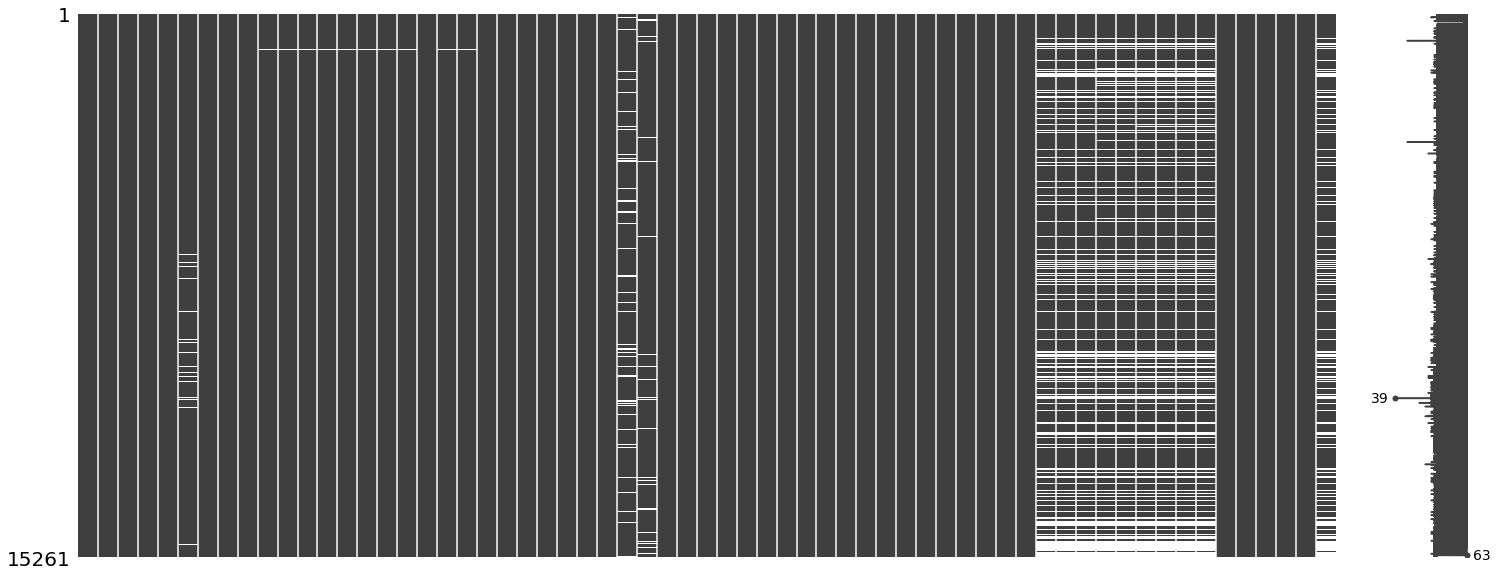

In [ ]:
#visualize missing values as a matrix
msno.matrix(listings, figsize=(25,10))

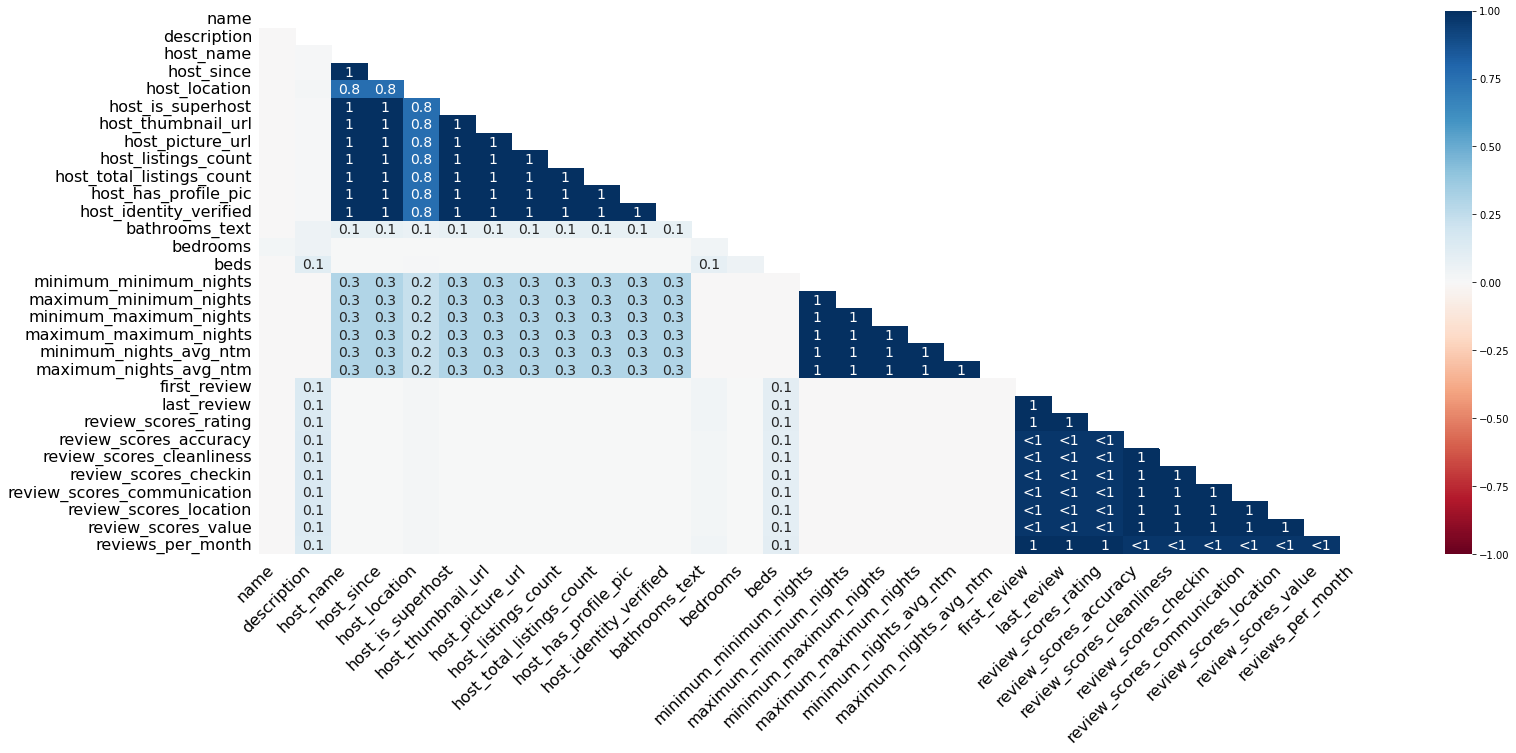

In [ ]:
#visualize missing values as a missing correlation
msno.heatmap(listings, figsize=(25,10))

> ## **Data Preprocessing**

> In this part, we need to deal with all columns with missing values, which contain duplicate values, and outliers, and convert categorical columns to numerical and select the best features for our tasks

> #### **Feature Selection**

> drop the columns which have unique value

In [ ]:
# drop any column that contain one constant value only
print('Drop following colums as they contain one constant value only: \n' + str(listings.columns[listings.nunique()==1].to_list()))
listings.drop(columns= listings.columns[listings.nunique()==1].to_list(), inplace = True)

Drop following colums as they contain one constant value only: 
['scrape_id']


> Show all column names to check which columns we are going to drop, which columns to handle, etc.

In [ ]:
#display all the columns name 
listings.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'description',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_r

> **what is the difference between the name column and the description column**

In [ ]:
listings['name'][0]

'Beautiful home in amazing area!'

In [ ]:
listings['description'][0]

"This large, family home is located in one of Toronto's most vibrant downtown neighbourhoods. The five-bedroom, three-bath house is newly renovated and complete with all the amenities you'll need for a fabulous time in the city.<br /><br /><b>The space</b><br />Visit Toronto with this fabulous furnished home as your base!<br /><br />This lovely home is surrounded by gardens in the back and front. Inside, you'll find a large open space with a modern kitchen and bright living and dining room. There are two floors up - a master bedroom with a king-size bed and two kids rooms, each with a single bed. The attic is a private space with a king-sized bed, fold-out single couch and a private deck. The basement is fully-finished with a private room and bath, as well as a playroom with another single couch that doubles as a sleeping space. The house will comfortably sleep 10. <br /><br />For kids of all ages: we have toys, a very cool tree fort, and many great parks and playgrounds nearby.<br /><

> As we can see, the discription column has many information and this information are exist in another columns like `[name, bathrooms_text, bedrooms,etc]` so we will drop this column

>We will
* drop all `url columns`
* drop all `id columns`
* drop all these columns`['host_name', 'host_id', 'id','description', 'host_location', 'host_listings_count', 'last_scraped','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review']`
* `['host_has_profile_pic', 'calendar_last_scraped', 'host_since']`

> Note: `host_has_profile_pic` column ,the all values that it has almost unique and about 58 records that has different values , so it's not representing any valid information.

In [ ]:
urls = ['listing_url', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']
listings.drop(urls, axis = 1, inplace = True)

In [ ]:
da = ['host_has_profile_pic', 'calendar_last_scraped', 'host_since']
listings.drop(da, axis = 1, inplace = True)

In [ ]:
drop_columns = ['host_name', 'host_id', 'id','description', 'host_location', 'host_listings_count', 'last_scraped','number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review']
listings.drop(drop_columns, axis = 1, inplace = True)

> ### **price**

In [ ]:
# all unique values for price column
listings.price.value_counts()

$100.00      504
$150.00      393
$50.00       345
$120.00      320
$80.00       313
            ... 
$811.00        1
$346.00        1
$634.00        1
$494.00        1
$1,600.00      1
Name: price, Length: 601, dtype: int64

In [ ]:
# The number of the unique values
len(listings.price.value_counts())

601

In [ ]:
# the type of this column
listings['price'].dtypes

dtype('O')

> As we can see, the price column is an `Object` column, So we need to convert it to a `float` column

In [ ]:
#convert price from object to flaot
listings['price'] = listings['price'].astype(str).str.replace(',', '', regex=True)
listings['price'] = listings['price'].astype(str).str.replace('$', '', regex=True)
listings['price'] = listings['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


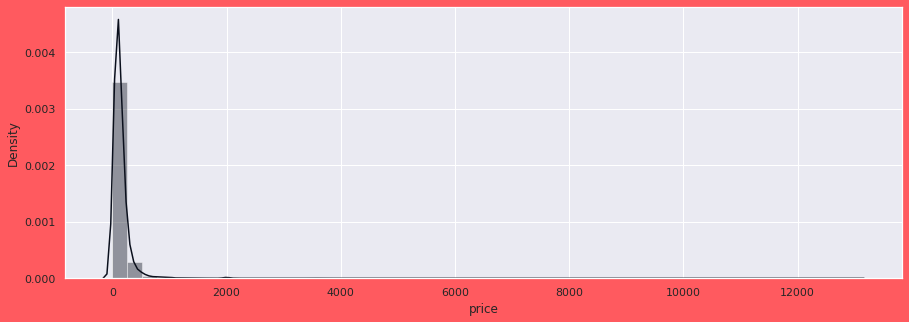

In [ ]:
# display the data distribution
distribution(listings.price)

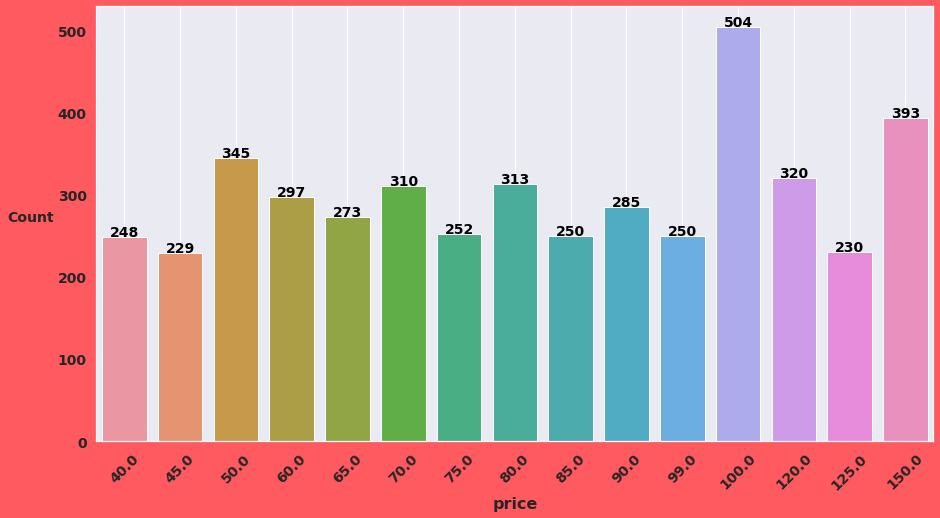

In [ ]:
# display the data distribution
dist_plot(listings.price,'price', 15)

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


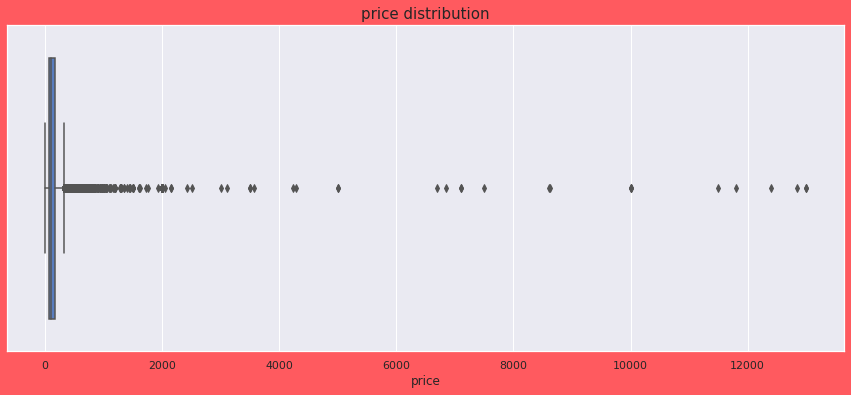

In [ ]:
outlierPlot(listings.price, 'price')

> #### But let's try to remove the outliers from `price` column . 

In [ ]:
# calculate Q1 and Q3
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

In [ ]:
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

listings[ listings['price'] > (Q3+1.5*IQR)]
listings[ listings['price'] < (Q1-1.5*IQR)]

listings = listings[ listings['price'] < (Q3+1.5*IQR)]
listings.shape

312.0
-80.0


(14277, 43)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


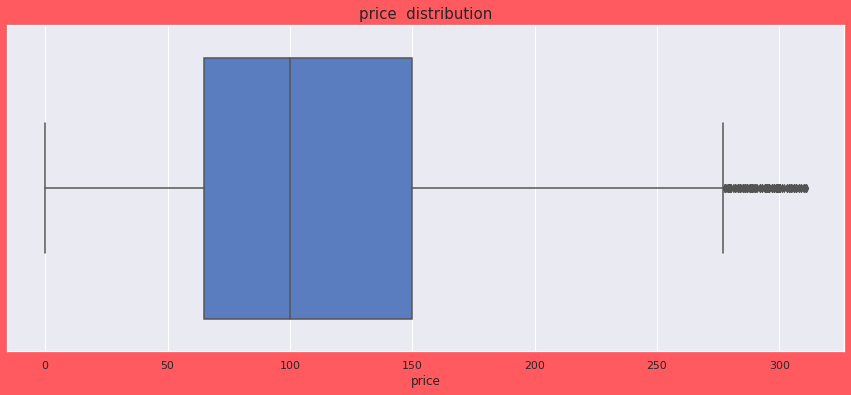

In [ ]:
outlierPlot(listings.price, 'price ')

In [ ]:
# calculate Q1 and Q3
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
listings = listings[ listings['price'] < (Q3+1.5*IQR)]
listings.shape

(13931, 43)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


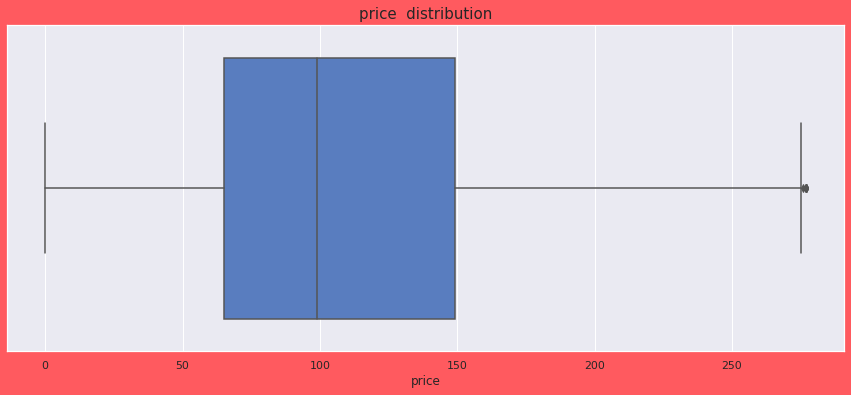

In [ ]:
outlierPlot(listings.price, 'price ')

In [ ]:
# calculate Q1 and Q3
Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
# calculate the IQR
IQR = Q3 - Q1
listings = listings[ listings['price'] < (Q3+1.5*IQR)]
listings.shape

(13895, 43)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


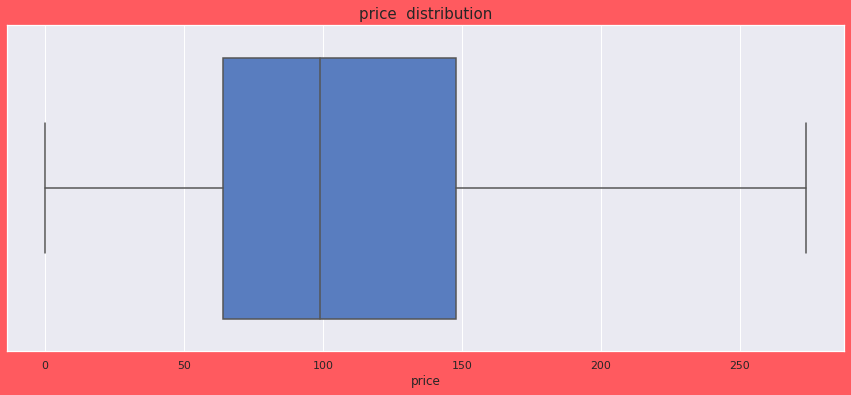

In [ ]:
outlierPlot(listings.price, 'price ')

> As we can see we don't have any outliers in `price` column.

In [ ]:
#check the duplicates
listings.duplicated(subset = None).value_counts()

False    13895
dtype: int64

> ### <A> Questions

> #### <A>  Questtion: Average listing price in neighbourhoods per room type?

> For Toronto - Canada Dataset.

In [ ]:
stats = listings.groupby(['neighbourhood_cleansed','room_type'])['price'].agg(['mean','std','count'])
stats.reset_index(inplace=True)
stats.head(5)

,neighbourhood_cleansed,room_type,mean,std,count
0,Agincourt North,Entire home/apt,156.000000,68.452741,10
1,Agincourt North,Private room,52.166667,14.565269,18
2,Agincourt North,Shared room,45.000000,7.071068,2
3,Agincourt South-Malvern West,Entire home/apt,116.315789,52.427784,19
4,Agincourt South-Malvern West,Private room,62.375000,27.893891,48


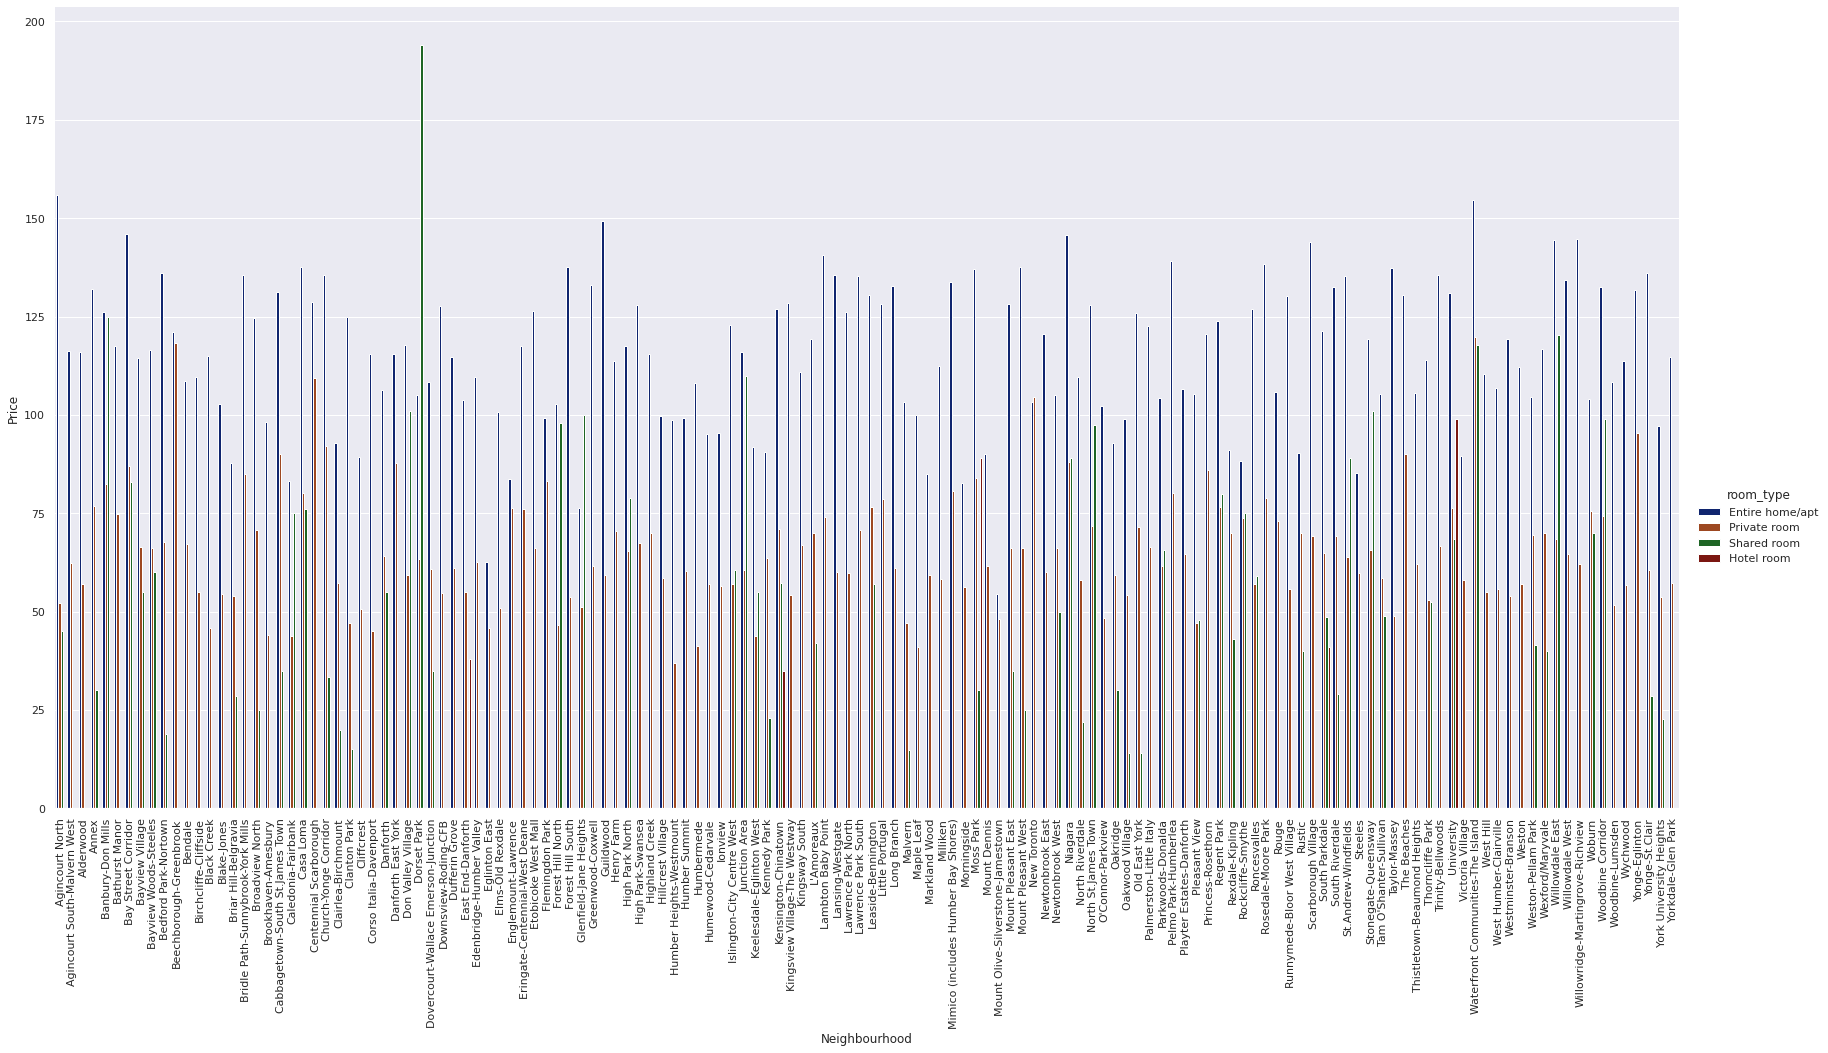

In [ ]:
# Draw a nested barplot
g = sns.catplot(data=stats, kind="bar", x="neighbourhood_cleansed", y="mean", hue="room_type", ci="sd", palette="dark", alpha=1, height=12,aspect=2)
g = g.despine(left=True)
g = g.set_axis_labels("Neighbourhood", "Price")
g = g.set_xticklabels(rotation=90)

> #### <A>  Question: Standard deviation among listing price of room types across neighbourhoods?

> For Toronto - Canada Dataset.

In [ ]:
stats = listings.groupby(['neighbourhood_cleansed','room_type'])['price'].agg(['mean','std','count'])
stats.reset_index(inplace=True)

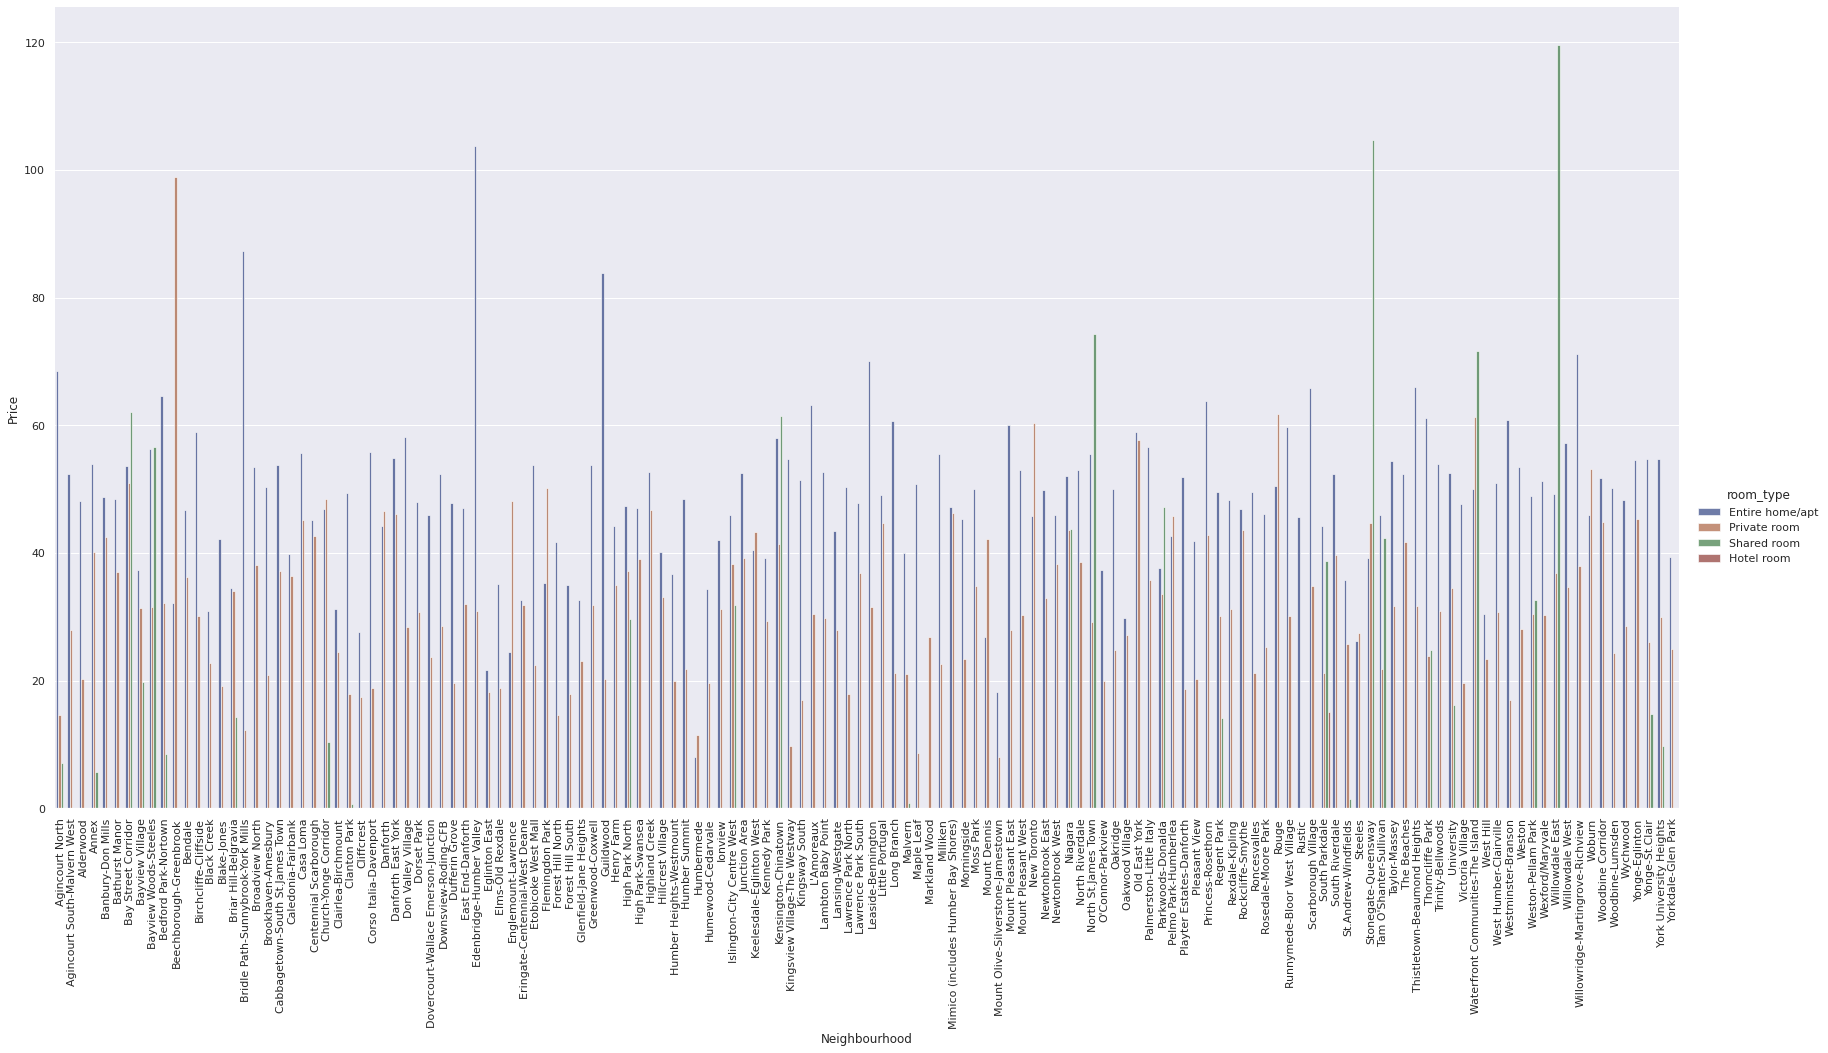

In [ ]:
# Draw a nested barplot
g = sns.catplot(data=stats, kind="bar", x="neighbourhood_cleansed", y="std", hue="room_type", ci="sd", palette="dark", alpha=.6, height=12,aspect=2)
g = g.despine(left=True)
g = g.set_axis_labels("Neighbourhood", "Price")
g = g.set_xticklabels(rotation=90)

> ### **Instant_bookable**

In [ ]:
#display the all unique values for instant_bookable column
listings.instant_bookable.value_counts()

f    10064
t     3831
Name: instant_bookable, dtype: int64

> `f` for False

> `t` for True

>Convert `instant_bookable` column to 1 if `t` and 0 if `f`.

In [ ]:
#convert the column to 0's and 1's
listings['instant_bookable'] = listings.instant_bookable.map( lambda x: 0 if x == 'f' else 1)

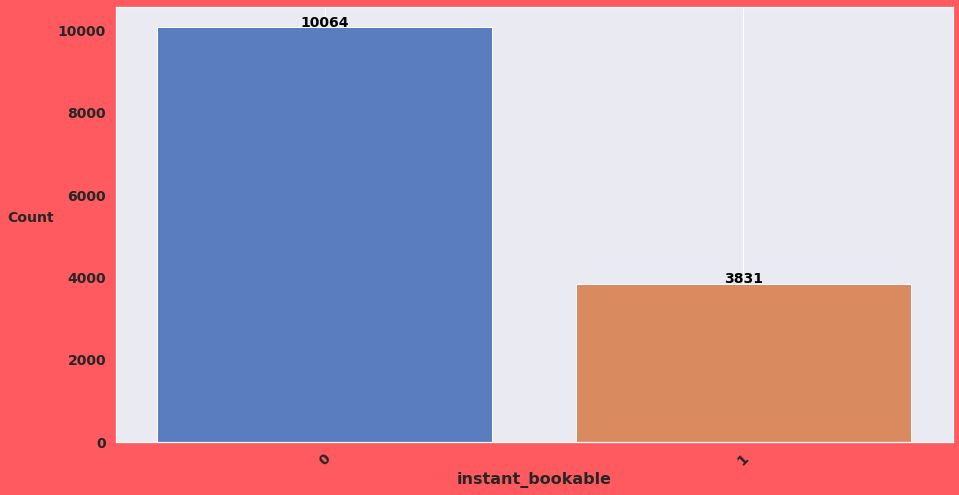

In [ ]:
# display the data distribution
dist_plot(listings.instant_bookable,'instant_bookable', 2)

In [ ]:
#check if there is any missing value
listings.instant_bookable.isnull().sum()

0

> ### **Host_identity_verified**

In [ ]:
#display the all unique values for host_identity_verified column
listings.host_identity_verified.value_counts()

t    11656
f     2230
Name: host_identity_verified, dtype: int64

> `f` for False

> `t` for True

>Convert `host_identity_verified` column to 1 if `t` and 0 if `f`.

In [ ]:
#convert the column to 0's and 1's
listings['host_identity_verified'] = listings.host_identity_verified.map( lambda x: 0 if x == 'f' else 1)

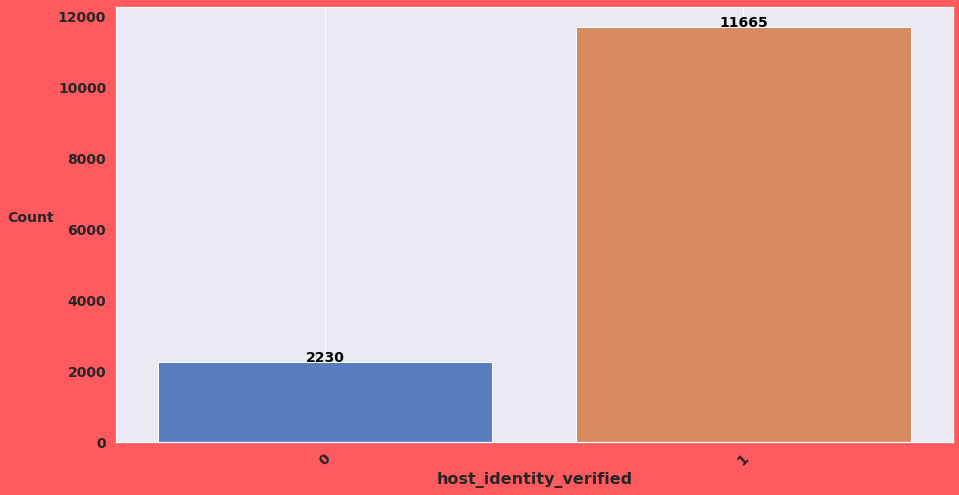

In [ ]:
# display the data distribution
dist_plot(listings.host_identity_verified,'host_identity_verified', 2)

In [ ]:
#check if there is any missing value
listings.host_identity_verified.isnull().sum()

0

> ### **Host_is_superhost**

In [ ]:
#display the all unique values for host_is_superhost column
listings.host_is_superhost.value_counts()

f    10194
t     3692
Name: host_is_superhost, dtype: int64

> `f` for False

> `t` for True

>Convert `host_is_superhost` column to 1 if `t` and 0 if `f`.

In [ ]:
#convert the column to 0's and 1's
listings['host_is_superhost'] = listings.host_is_superhost.map( lambda x: 0 if x == 'f' else 1)

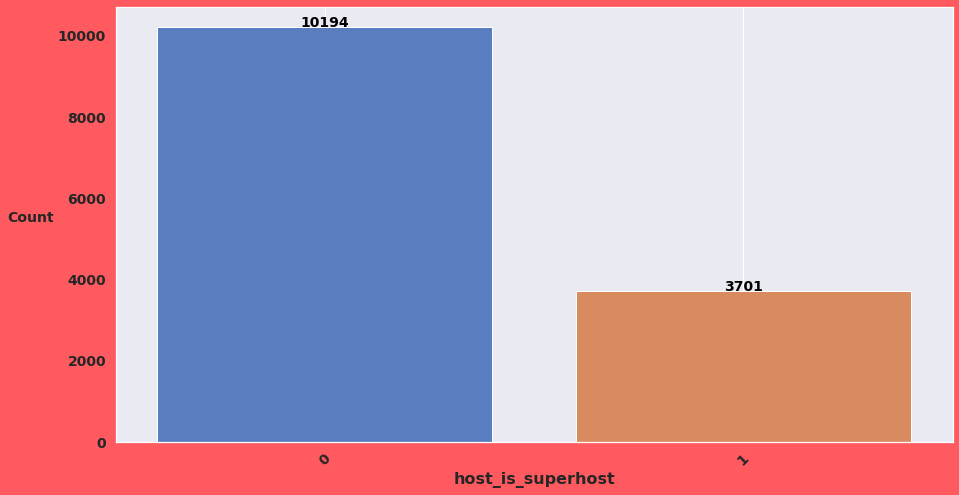

In [ ]:
# display the data distribution
dist_plot(listings.host_is_superhost,'host_is_superhost', 2)

In [ ]:
#check if there is any missing value
listings.host_is_superhost.isnull().sum()

0

> ### **has_availability**

In [ ]:
#display the all unique values for this column
listings.has_availability.value_counts()

t    13272
f      623
Name: has_availability, dtype: int64

> `f` for False

> `t` for True

>Convert `has_availability` column to 1 if `t` and 0 if `f`.

In [ ]:
#convert the column to 0's and 1's
listings['has_availability'] = listings.instant_bookable.map( lambda x: 0 if x == 'f' else 1)

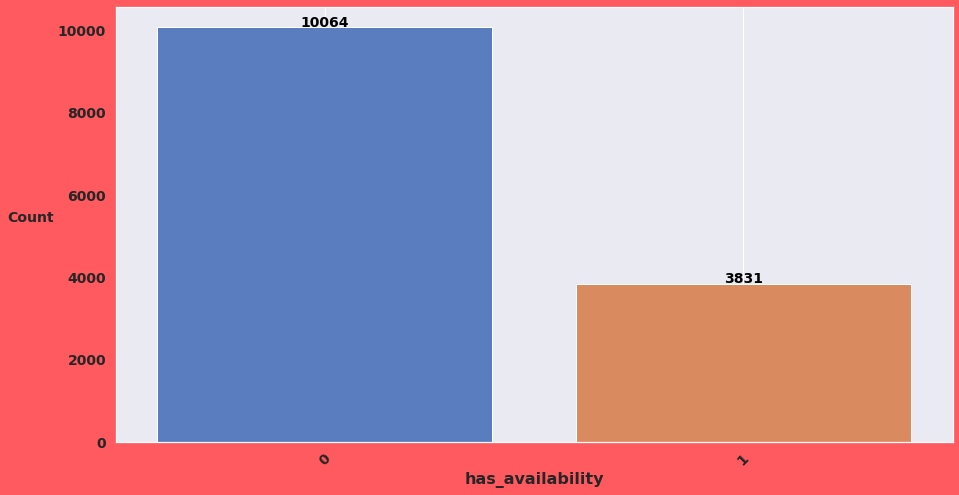

In [ ]:
# display the data distribution
dist_plot(listings.instant_bookable,'has_availability', 2)

In [ ]:
#check if there is any missing value
listings.has_availability.isnull().sum()

0

> ### **accommodates**

In [ ]:
#display the all unique values for this column
listings.accommodates.value_counts()

2     5996
4     2642
1     2192
3     1516
6      666
5      567
8      124
7      103
10      41
9       16
16      11
12      10
11       4
0        3
13       2
15       2
Name: accommodates, dtype: int64

In [ ]:
# The number of the unique values
len(listings.accommodates.value_counts())

16

In [ ]:
# the type of this column
listings['accommodates'].dtypes

dtype('int64')

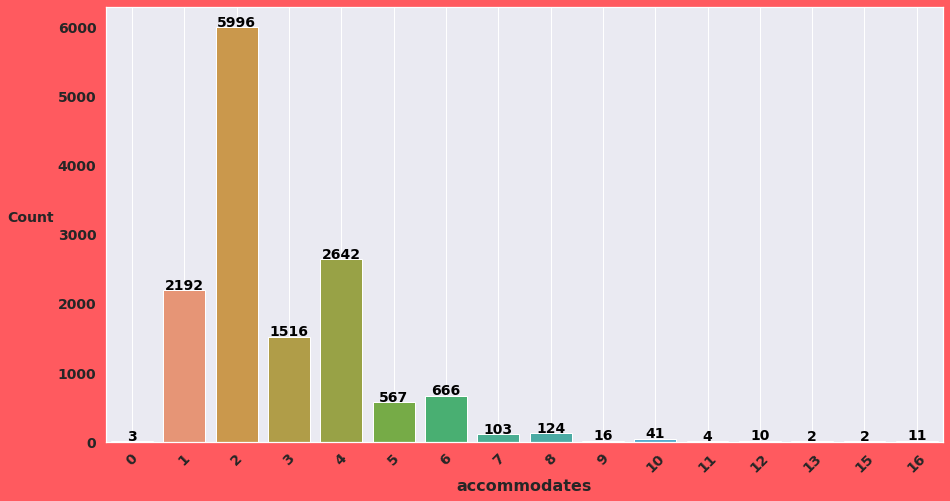

In [ ]:
# display the data distribution
dist_plot(listings.accommodates,'accommodates', 16)

In [ ]:
#check if there is any missing value
listings.accommodates.isnull().sum()

0

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


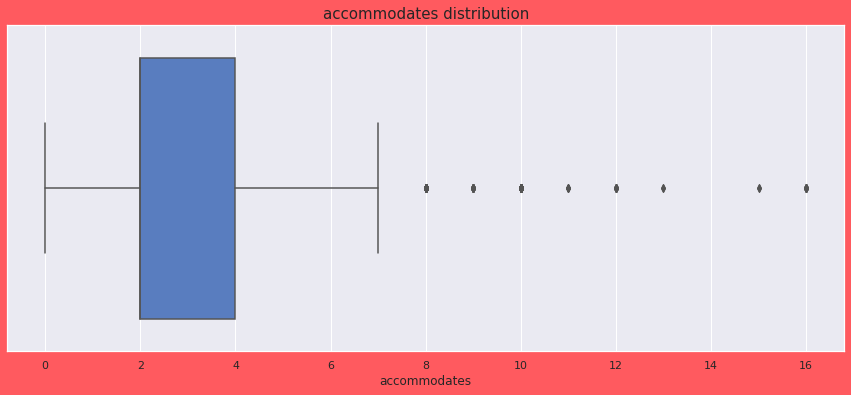

In [ ]:
#display the outliers
outlierPlot(listings.accommodates, 'accommodates')

> #### But let's try to remove the outliers

In [ ]:
# calculate Q1 and Q3
Q1 = listings['accommodates'].quantile(0.25)
Q3 = listings['accommodates'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

In [ ]:
print(Q3+1.5*IQR)
print(Q1-1.5*IQR)

listings[ listings['accommodates'] > (Q3+1.5*IQR)]
listings[ listings['accommodates'] < (Q1-1.5*IQR)]

listings = listings[ listings['accommodates'] < (Q3+1.5*IQR)]
listings.shape

7.0
-1.0


(13582, 43)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


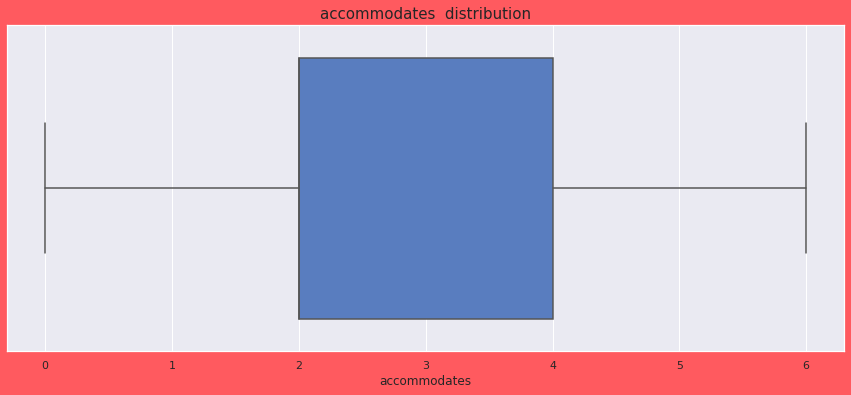

In [ ]:
outlierPlot(listings.accommodates, 'accommodates ')

> As we can see we don't have any outliers in `accommodates` column.

> ### **host_total_listings_count**

In [ ]:
#display the all unique values for this column
listings.host_total_listings_count.value_counts()

1.0      5119
0.0      2072
2.0      1795
3.0      1064
4.0       660
5.0       369
6.0       282
7.0       193
8.0       172
9.0       138
11.0      138
28.0      128
12.0      118
20.0       98
14.0       96
10.0       95
17.0       91
23.0       84
13.0       80
15.0       71
16.0       64
225.0      59
51.0       53
38.0       46
25.0       43
18.0       41
26.0       40
36.0       36
59.0       35
22.0       34
61.0       32
56.0       30
29.0       29
196.0      29
46.0       25
24.0       25
272.0      17
21.0       15
32.0       13
35.0       13
37.0        9
27.0        8
19.0        4
30.0        4
68.0        3
64.0        2
74.0        1
Name: host_total_listings_count, dtype: int64

In [ ]:
len(listings.host_total_listings_count.value_counts())

47

In [ ]:
# The number of the unique values
listings['host_total_listings_count'].dtypes

dtype('float64')

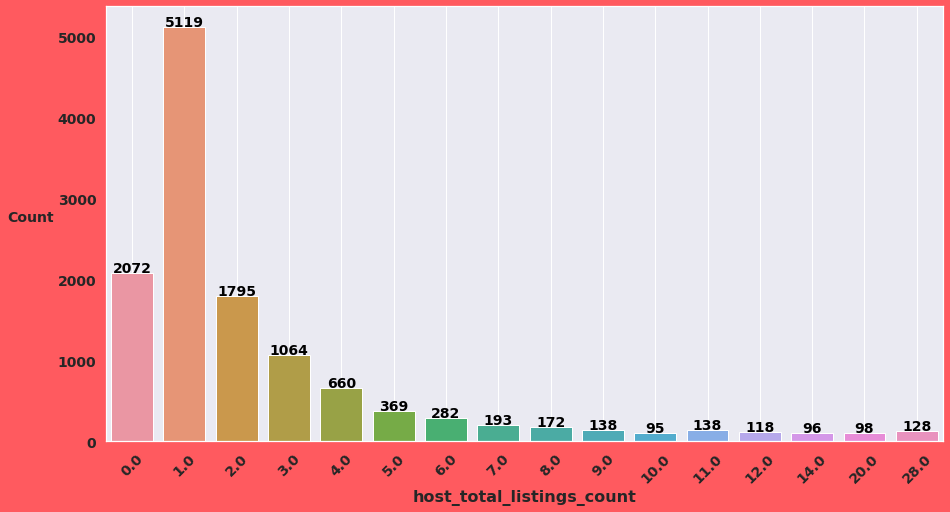

In [ ]:
# display the data distribution
dist_plot(listings.host_total_listings_count,'host_total_listings_count', 16)

In [ ]:
#check if there is any missing value
listings.host_total_listings_count.isnull().sum()

9

In [ ]:
#drop the null values because it's less than 1% from the dataset
listings.dropna(subset=['host_total_listings_count'], inplace = True)

> ### **availability_30**

In [ ]:
#display the all unique values for this column
listings.availability_30.value_counts()

0     6454
30    1280
4      580
29     506
5      333
2      329
1      322
3      315
28     255
6      199
7      196
8      192
23     189
9      188
27     174
10     167
11     166
13     160
16     153
12     144
15     138
17     136
14     135
18     128
20     122
26     120
19     107
21     104
25     100
22      97
24      84
Name: availability_30, dtype: int64

In [ ]:
# The number of the unique values
len(listings.availability_30.value_counts())

31

In [ ]:
# the type of this column
listings['availability_30'].dtypes

dtype('int64')

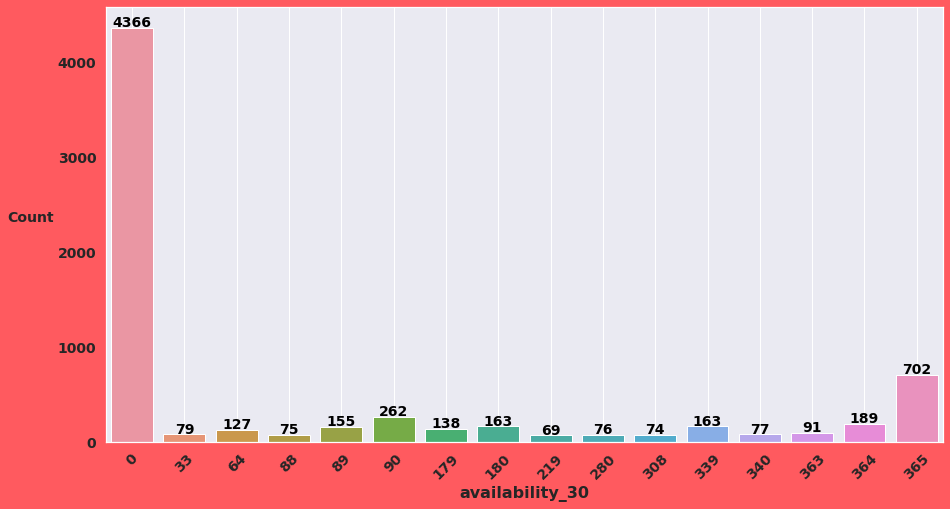

In [ ]:
# display the data distribution
dist_plot(listings.availability_365,'availability_30', 16)

In [ ]:
#check if there is any missing value
listings.availability_30.isnull().sum()

0

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


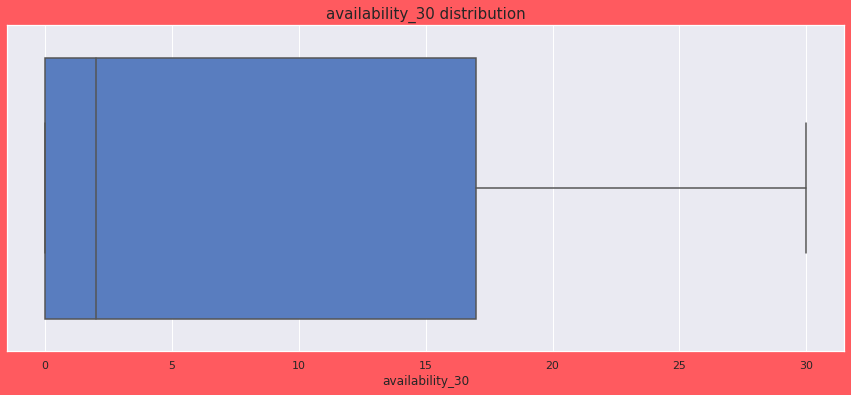

In [ ]:
#checking for outliers
outlierPlot(listings.availability_30, 'availability_30')

> ### **availability_60**

In [ ]:
#display the all unique values for this column
listings.availability_60.value_counts()

0     5511
60    1235
59     487
34     385
3      281
      ... 
52      66
22      63
11      62
15      62
10      60
Name: availability_60, Length: 61, dtype: int64

In [ ]:
# The number of the unique values
len(listings.availability_60.value_counts())

61

In [ ]:
# the type of this column
listings['availability_60'].dtypes

dtype('int64')

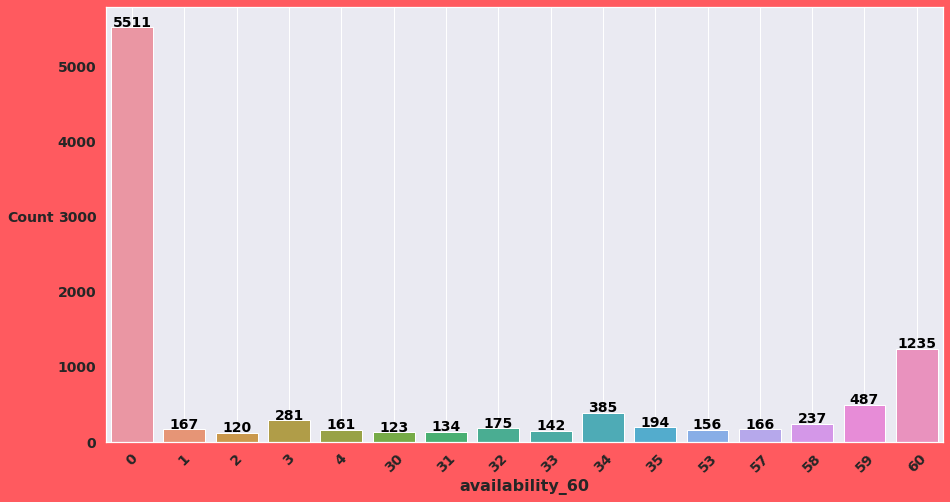

In [ ]:
# display the data distribution
dist_plot(listings.availability_60,'availability_60', 16)

In [ ]:
#check if there is any missing value
listings.availability_60.isnull().sum()

0

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


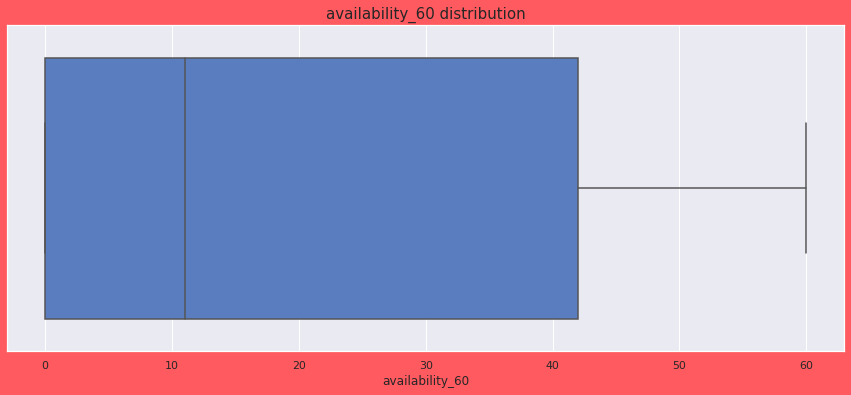

In [ ]:
#checking for outliers
outlierPlot(listings.availability_60, 'availability_60')

> ### **availability_90**

In [ ]:
#display the all unique values for this column
listings.availability_90.value_counts()

0     5129
90    1206
89     493
64     354
88     236
      ... 
18      38
21      36
11      36
16      32
19      32
Name: availability_90, Length: 91, dtype: int64

In [ ]:
# The number of the unique values
len(listings.availability_90.value_counts())

91

In [ ]:
# the type of this column
listings['availability_90'].dtypes

dtype('int64')

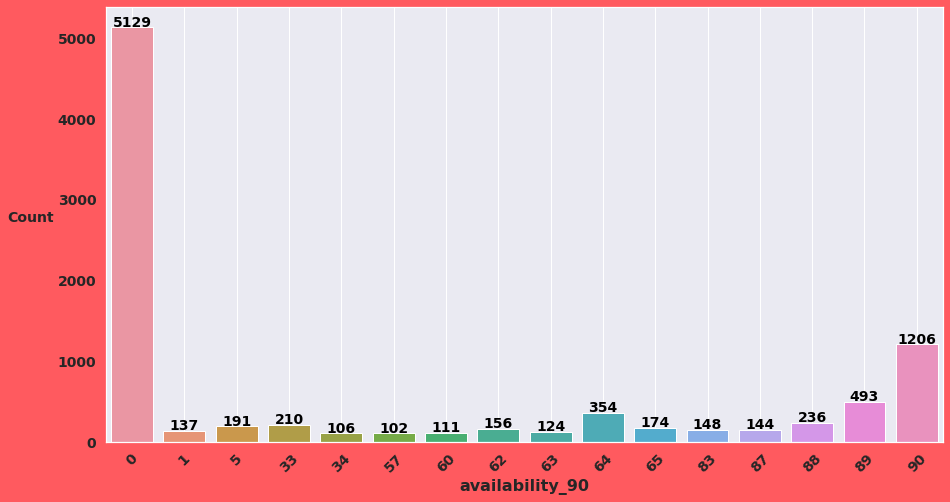

In [ ]:
# display the data distribution
dist_plot(listings.availability_90,'availability_90', 16)

In [ ]:
#check if there is any missing value
listings.availability_90.isnull().sum()

0

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


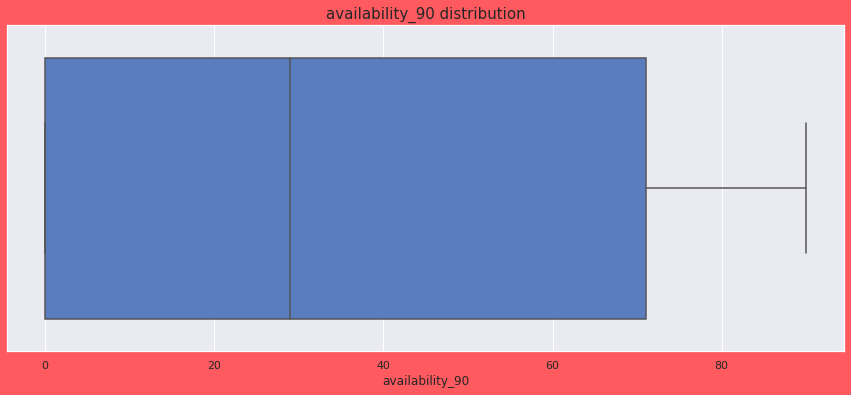

In [ ]:
#checking for outliers
outlierPlot(listings.availability_90, 'availability_90')

> ### **availability_365**

In [ ]:
#display the all unique values for this column
listings.availability_365.value_counts()

0      4366
365     702
90      262
364     189
180     163
       ... 
199       4
235       3
196       3
198       2
203       1
Name: availability_365, Length: 366, dtype: int64

In [ ]:
# The number of the unique values
len(listings.availability_365.value_counts())

366

In [ ]:
# the type of this column
listings['availability_365'].dtypes

dtype('int64')

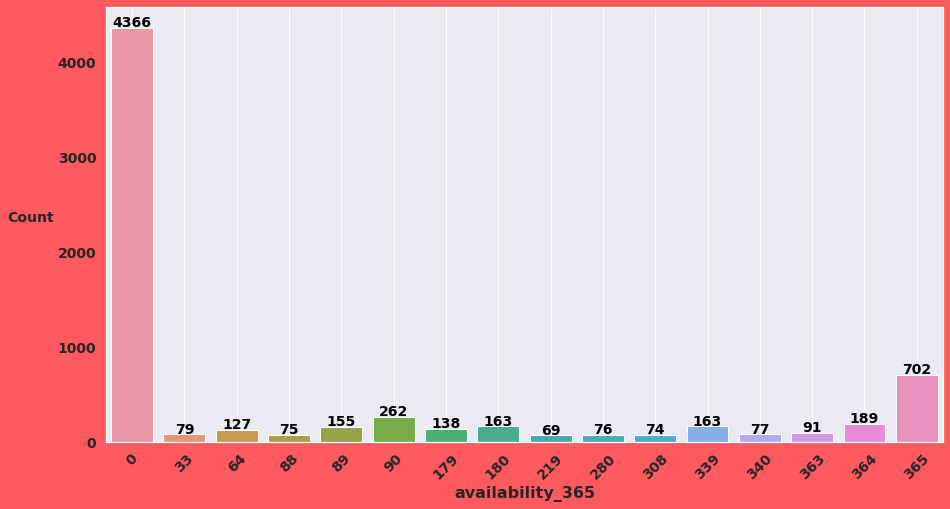

In [ ]:
# display the data distribution
dist_plot(listings.availability_365,'availability_365', 16)

In [ ]:
#check if there is any missing value
listings.availability_365.isnull().sum()

0

> ##### **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


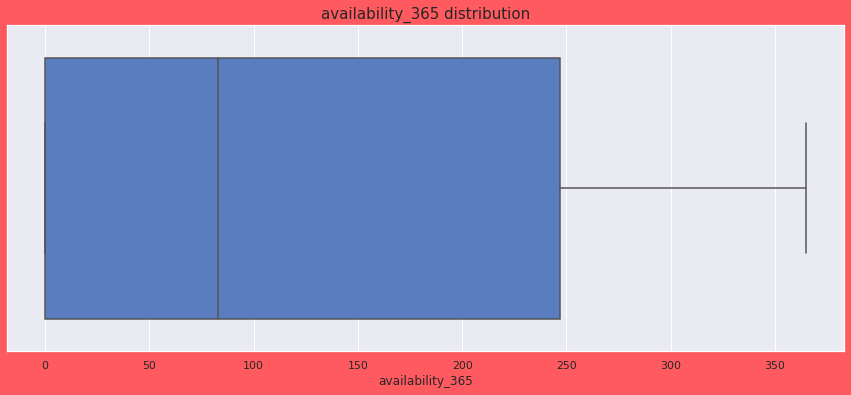

In [ ]:
#checking for outliers
outlierPlot(listings.availability_365, 'availability_365')

> As we can see we don't have any outliers in `accommodates` column.

> ### **calculated_host_listings_count_shared_rooms**

In [ ]:
#display the all unique values for calculated_host_listings_count_shared_rooms column
listings.calculated_host_listings_count_shared_rooms.value_counts()

0     13254
1       158
34       36
2        35
4        30
7        20
8        16
3        14
6        10
Name: calculated_host_listings_count_shared_rooms, dtype: int64

In [ ]:
# The number of the unique values
len(listings.calculated_host_listings_count_shared_rooms.value_counts())

9

In [ ]:
# the type of this column
listings['calculated_host_listings_count_shared_rooms'].dtypes

dtype('int64')

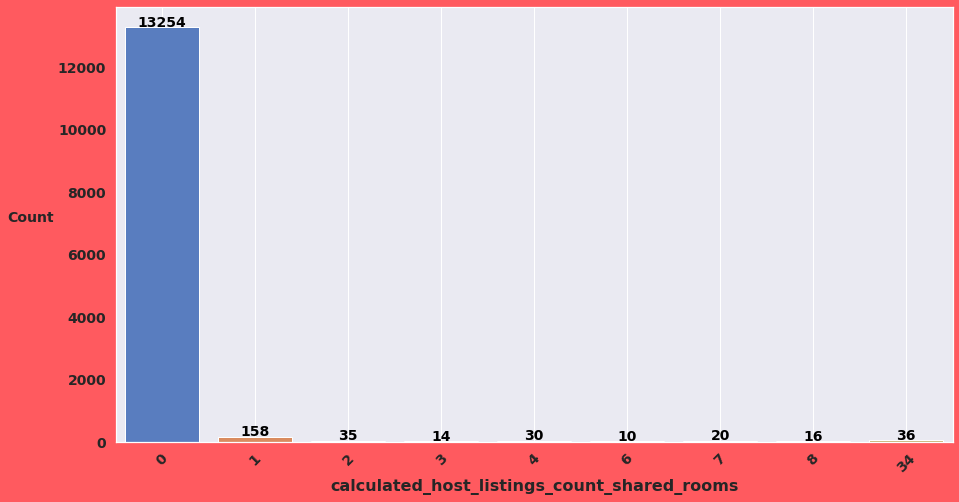

In [ ]:
# display the data distribution
dist_plot(listings.calculated_host_listings_count_shared_rooms,'calculated_host_listings_count_shared_rooms', 20)

In [ ]:
#check if there is any missing value
listings.calculated_host_listings_count_shared_rooms.isnull().sum()

0

> ### **calculated_host_listings_count_private_rooms**

In [ ]:
#display the all unique values for calculated_host_listings_count_private_rooms column
listings.calculated_host_listings_count_private_rooms.value_counts()

0     8150
1     2286
2      850
3      700
4      378
5      215
6      139
8      131
7      121
9      118
11     103
10      63
12      61
14      44
20      40
13      31
21      30
29      30
23      24
22      24
17      20
16      15
Name: calculated_host_listings_count_private_rooms, dtype: int64

In [ ]:
# The number of the unique values
len(listings.calculated_host_listings_count_private_rooms.value_counts())

22

In [ ]:
# the type of this column
listings['calculated_host_listings_count_private_rooms'].dtypes

dtype('int64')

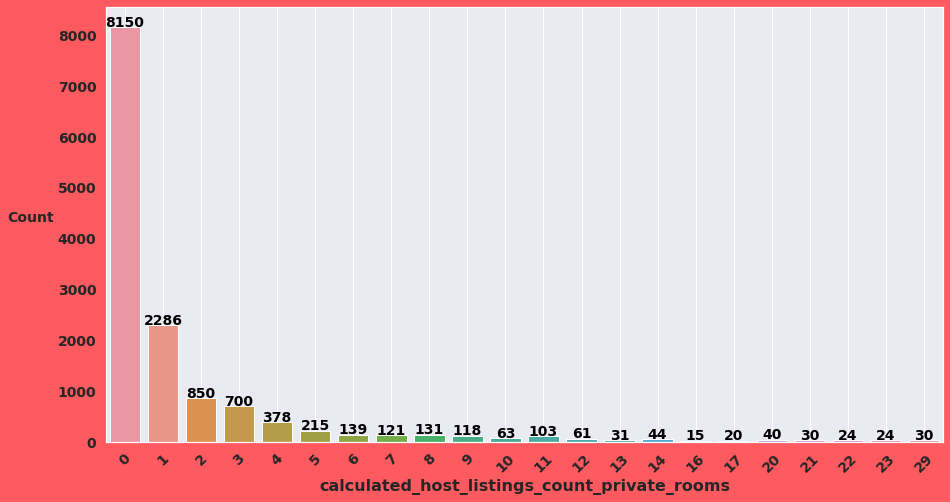

In [ ]:
# display the data distribution
dist_plot(listings.calculated_host_listings_count_private_rooms,'calculated_host_listings_count_private_rooms', 22)

> ### **calculated_host_listings_count_entire_homes**

In [ ]:
#display the all unique values for calculated_host_listings_count_entire_homes column
listings.calculated_host_listings_count_entire_homes.value_counts()

1      5901
0      4112
2      1242
3       533
4       307
5       161
6       145
7       126
123     122
10       93
11       86
8        80
12       60
67       59
16       51
15       45
9        45
22       44
25       41
49       37
43       34
33       32
17       29
35       29
20       29
14       28
13       28
18       26
26       25
23       23
Name: calculated_host_listings_count_entire_homes, dtype: int64

In [ ]:
# The number of the unique values
len(listings.calculated_host_listings_count_entire_homes.value_counts())

30

In [ ]:
# the type of this column
listings['calculated_host_listings_count_entire_homes'].dtypes

dtype('int64')

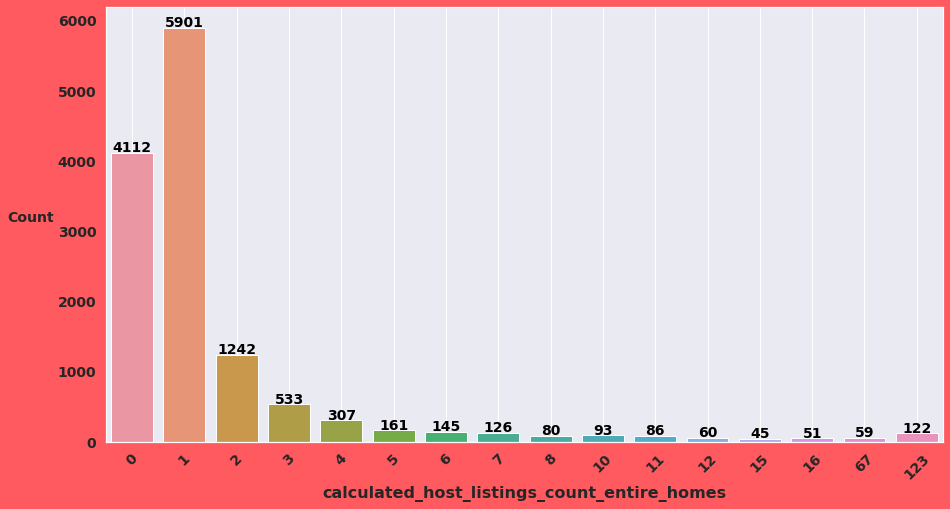

In [ ]:
# display the data distribution
dist_plot(listings.calculated_host_listings_count_entire_homes,'calculated_host_listings_count_entire_homes', 16)

In [ ]:
#check if there is any missing value
listings.calculated_host_listings_count_entire_homes.isnull().sum()

0

> ### **calculated_host_listings_count**

In [ ]:
#display the all unique values for calculated_host_listings_count column
listings.calculated_host_listings_count.value_counts()

1      7032
2      1863
3      1144
4       785
5       398
6       269
7       249
10      189
11      169
9       125
123     122
8       118
12      115
16      113
22      101
15       96
67       59
29       58
14       58
24       48
18       47
17       46
25       42
20       40
23       38
49       37
36       36
43       34
33       32
30       30
35       29
13       26
26       25
Name: calculated_host_listings_count, dtype: int64

In [ ]:
# The number of the unique values
len(listings.calculated_host_listings_count.value_counts())

33

In [ ]:
# the type of this column
listings['calculated_host_listings_count'].dtypes

dtype('int64')

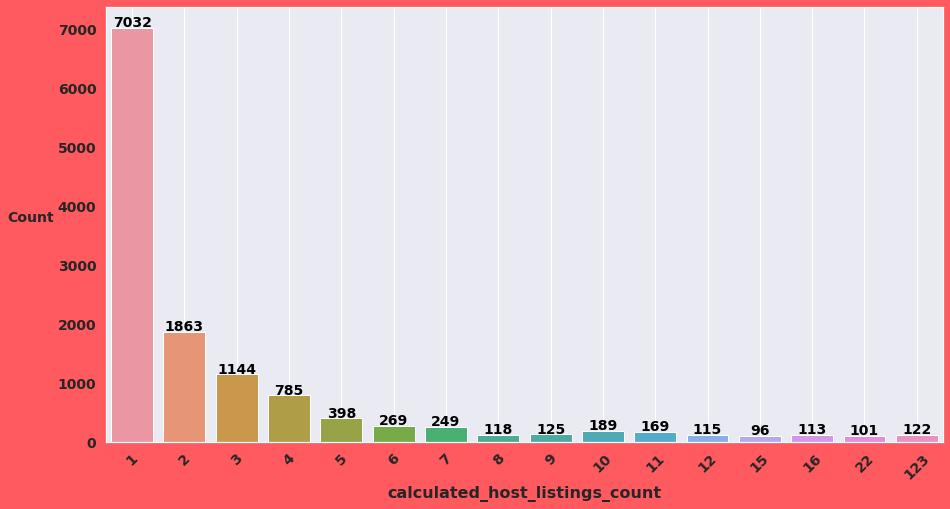

In [ ]:
# display the data distribution
dist_plot(listings.calculated_host_listings_count,'calculated_host_listings_count', 16)

In [ ]:
#check if there is any missing value
listings.calculated_host_listings_count.isnull().sum()

0

> ### **neighbourhood_cleansed**

In [ ]:
#display the all unique values for neighbourhood_cleansed column
listings.neighbourhood_cleansed.value_counts()

Waterfront Communities-The Island    2226
Niagara                               523
Church-Yonge Corridor                 442
Annex                                 432
Bay Street Corridor                   391
                                     ... 
Humbermede                              9
Bridle Path-Sunnybrook-York Mills       8
Markland Wood                           8
Kingsway South                          7
Rustic                                  5
Name: neighbourhood_cleansed, Length: 140, dtype: int64

In [ ]:
# The number of the unique values
len(listings.neighbourhood_cleansed.value_counts())

140

In [ ]:
# the type of this column
listings['neighbourhood_cleansed'].dtypes

dtype('O')

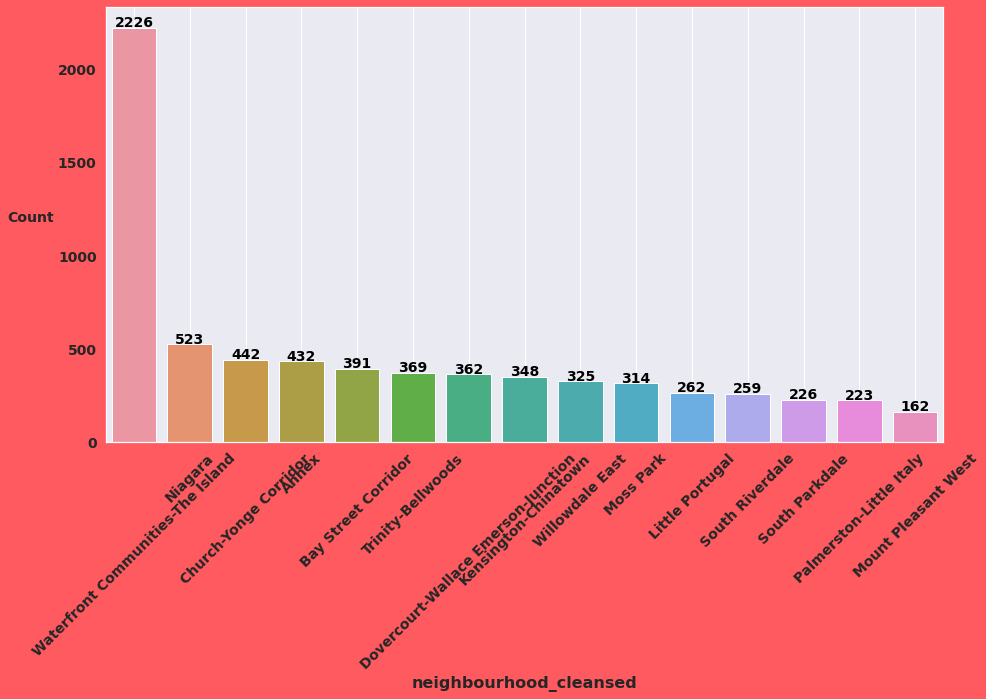

In [ ]:
# display the data distribution
dist_plot(listings.neighbourhood_cleansed,'neighbourhood_cleansed', 15)

In [ ]:
#check if there is any missing value
listings.neighbourhood_cleansed.isnull().sum()

0

> ### **latitude**

In [ ]:
#display the all unique values for latitude column
listings.latitude.value_counts()

43.644130    20
43.641320    15
43.660400    15
43.670320    13
43.642870    11
             ..
43.663800     1
43.673910     1
43.721540     1
43.689780     1
43.719692     1
Name: latitude, Length: 7955, dtype: int64

In [ ]:
# The number of the unique values
len(listings.latitude.value_counts())

7955

In [ ]:
# the type of this column
listings['latitude'].dtypes

dtype('float64')

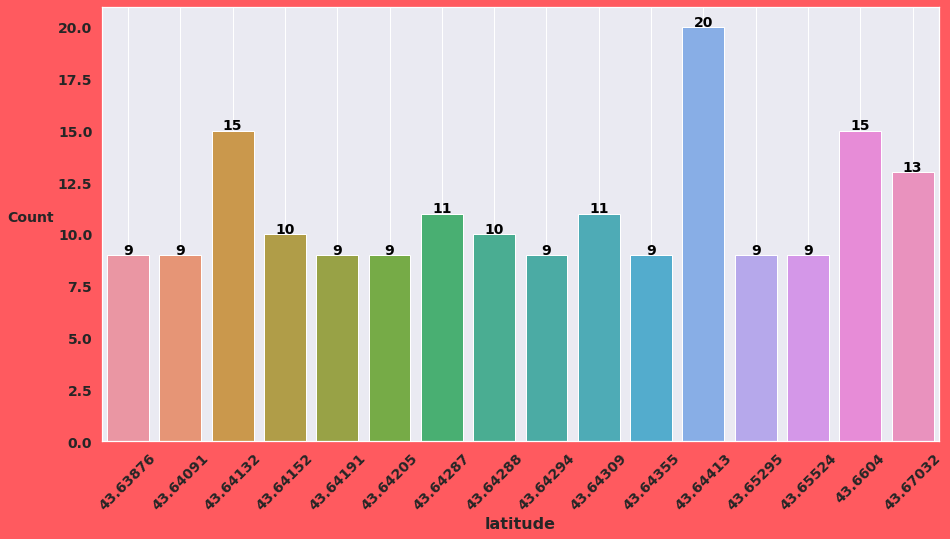

In [ ]:
# display the data distribution
dist_plot(listings.latitude,'latitude', 16)

In [ ]:
#check if there is any missing value
listings.latitude.isnull().sum()

0

> ### **longitude**

In [ ]:
#display the all unique values for longitude column
listings.longitude.value_counts()

-79.389400    15
-79.372890    15
-79.431340    12
-79.380620    10
-79.381780    10
              ..
-79.440120     1
-79.384390     1
-79.142940     1
-79.347430     1
-79.350359     1
Name: longitude, Length: 9566, dtype: int64

In [ ]:
# The number of the unique values
len(listings.latitude.value_counts())

7955

In [ ]:
# the type of this column
listings['longitude'].dtypes

dtype('float64')

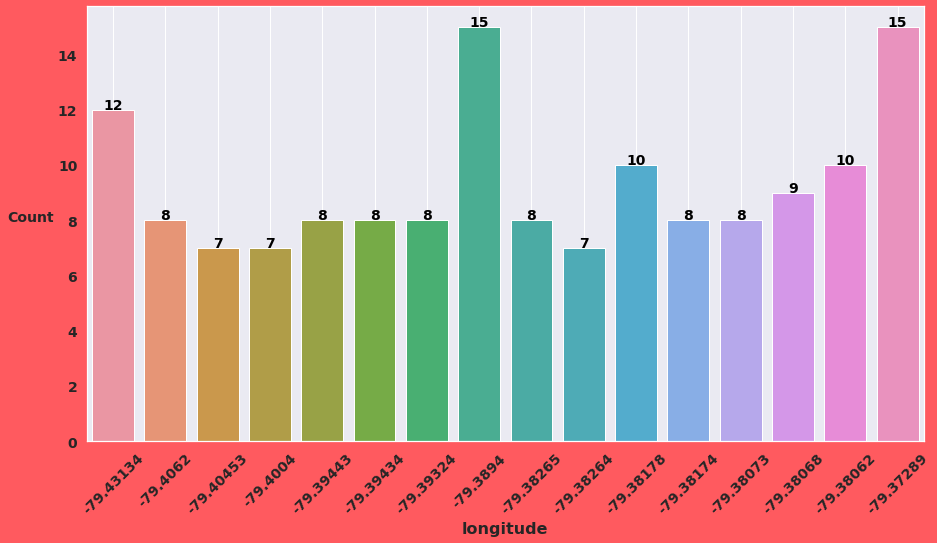

In [ ]:
# display the data distribution
dist_plot(listings.longitude,'longitude', 16)

In [ ]:
#check if there is any missing value
listings.longitude.isnull().sum()

0

> ### **number_of_reviews**

In [ ]:
#display the all unique values for number_of_reviews column
listings.number_of_reviews.value_counts()

0      3008
1      1393
2       810
3       626
4       498
       ... 
228       1
281       1
396       1
321       1
305       1
Name: number_of_reviews, Length: 362, dtype: int64

In [ ]:
# The number of the unique values
len(listings.number_of_reviews.value_counts())

362

In [ ]:
# the type of this column
listings['number_of_reviews'].dtypes

dtype('int64')

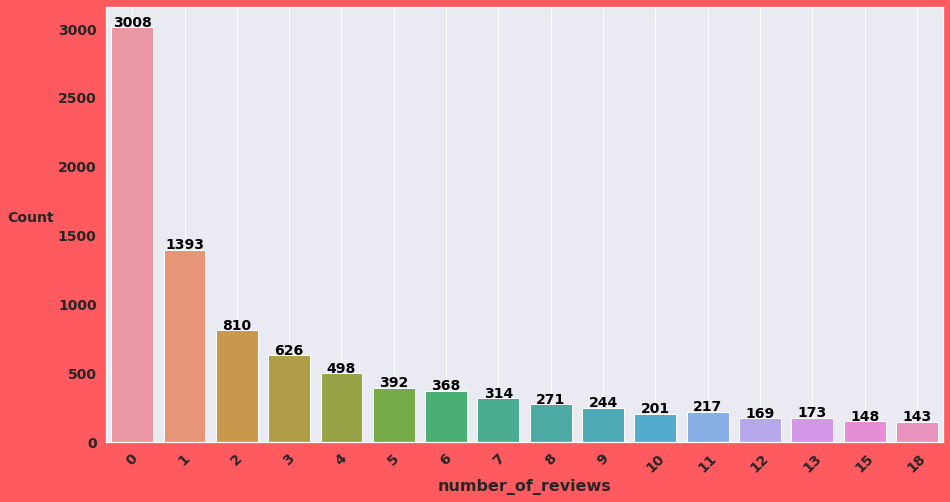

In [ ]:
# display the data distribution
dist_plot(listings.number_of_reviews,'number_of_reviews', 16)

In [ ]:
#check if there is any missing value
listings.number_of_reviews.isnull().sum()

0

> ### **bathrooms_text**

In [ ]:
#display the all unique values for bathrooms_text column
listings.bathrooms_text.value_counts()

1 bath               7376
1 shared bath        2310
1 private bath       1239
2 baths              1150
1.5 baths             558
1.5 shared baths      323
2 shared baths        308
2.5 baths              99
3 baths                47
3 shared baths         34
0 shared baths         26
2.5 shared baths       23
0 baths                17
3.5 shared baths       15
3.5 baths              11
Shared half-bath        8
Half-bath               7
4.5 shared baths        5
4 baths                 3
4 shared baths          3
5 baths                 1
Private half-bath       1
4.5 baths               1
Name: bathrooms_text, dtype: int64

In [ ]:
# The number of the unique values
len(listings.bathrooms_text.value_counts())

23

In [ ]:
# the type of this column
listings['bathrooms_text'].dtypes

dtype('O')

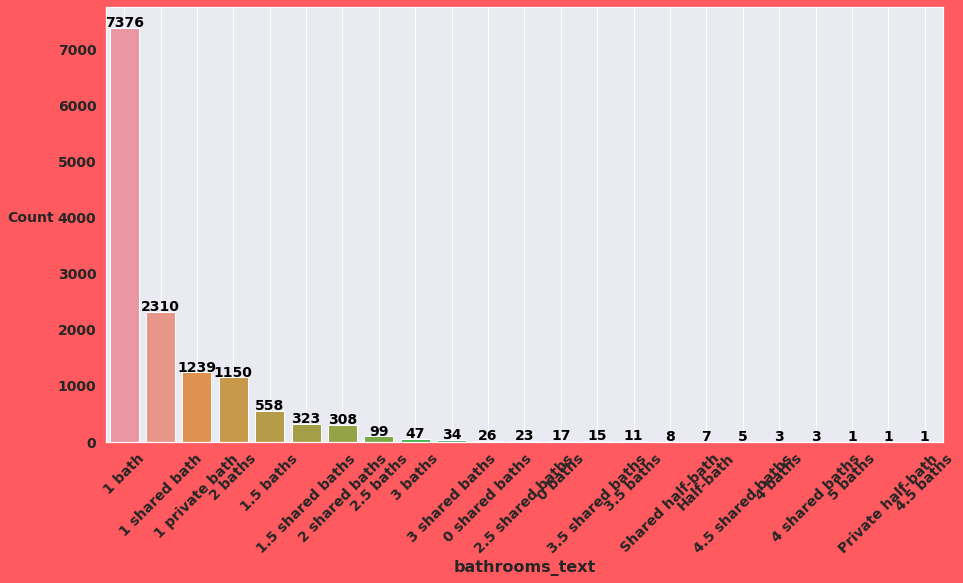

In [ ]:
# display the data distribution
dist_plot(listings.bathrooms_text,'bathrooms_text', 23)

In [ ]:
#check if there is any missing value
listings.bathrooms_text.isnull().sum()

8

> We will fill the null values by the minimum value which is `1-normal bath`

In [ ]:
#fill the null values
listings['bathrooms_text'] = listings['bathrooms_text'].fillna('1-normal bath')

> xtract two columns from `bathrooms_text` column `bathromm type` and `number of bathromms`

> handling all values to be easy for us to handle this column with easy way

In [ ]:
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1 bath','1-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('2 baths','2-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('Half-bath','0.5-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('3 baths','3-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('4 baths','4-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('4.5 baths','4.5-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('3.5 baths','3.5-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('5 baths','5-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1.5 baths','1.5-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('4.5 private baths','4.5-private bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('4.5 shared baths','4.5-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1 private baths','1-private bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1 private bath','1-private bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1 shared bath','1-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1 shared baths','1-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('2 shared baths','2-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('1.5 shared baths','1.5-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('2.5 shared baths','2.5-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('4 shared baths','4-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('3 shared baths','3-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('3.5 shared baths','3.5-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('0 shared baths','0-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('Shared half-bath','0.5-shared bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('Private half-bath','0.5-private bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('0 baths','0-normal bath')
listings['bathrooms_text'] = listings['bathrooms_text'].replace('2.5 baths','2.5-normal bath')
# print(listings)

In [ ]:
#extract the new two columns
listings[['bathrooms','bathrooms_type']]=listings.bathrooms_text.str.split('-',expand=True)

In [ ]:
#drop the bathrooms_text column after extract the new information from it
listings.drop(['bathrooms_text'], axis = 1, inplace = True) 

In [ ]:
# convert the type of bathrooms number to float
listings['bathrooms'] = listings['bathrooms'].astype(float)

> ### **bedrooms**

In [ ]:
#display the all unique values for bedrooms column
listings.bedrooms.value_counts()

1.0    9523
2.0    2403
3.0     512
4.0      44
5.0       6
6.0       1
9.0       1
Name: bedrooms, dtype: int64

In [ ]:
# The number of the unique values
len(listings.bedrooms.value_counts())

7

In [ ]:
# the type of this column
listings['bedrooms'].dtypes

dtype('float64')

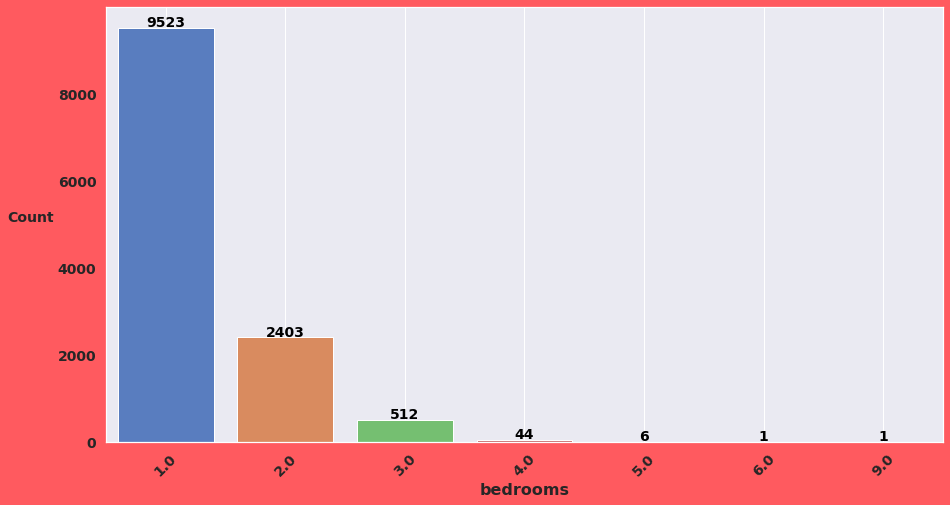

In [ ]:
# display the data distribution
dist_plot(listings.bedrooms,'bedrooms', 16)

In [ ]:
#check if there is any missing value
listings.bedrooms.isnull().sum()

1083

In [ ]:
# Use IterativeImputer to predict missing values.
imputer = SimpleImputer(strategy ='median')
# Fit to data, then transform it.
listings['bedrooms'] = imputer.fit_transform(listings[['bedrooms']])

> ### **beds**

In [ ]:
#display the all unique values for beds column
listings.beds.value_counts()

1.0     8002
2.0     3582
3.0     1036
4.0      208
5.0       31
6.0       14
8.0        3
7.0        2
10.0       1
Name: beds, dtype: int64

In [ ]:
# The number of the unique values
len(listings.beds.value_counts())

9

In [ ]:
# the type of this column
listings['beds'].dtypes

dtype('float64')

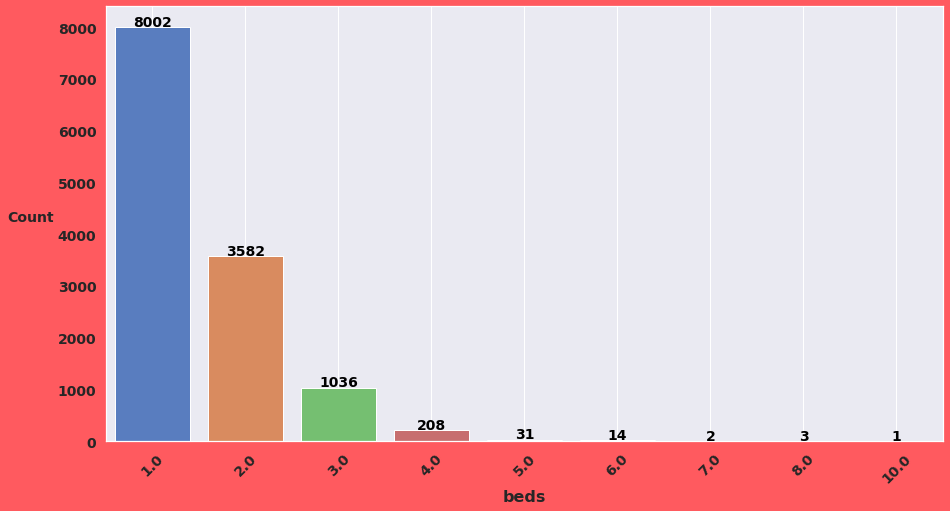

In [ ]:
# display the data distribution
dist_plot(listings.beds,'beds', 16)

In [ ]:
#check if there is any missing value
listings.beds.isnull().sum()

694

In [ ]:
# Use IterativeImputer to predict missing values.
imputer = SimpleImputer(strategy ='median')
# Fit to data, then transform it.
listings['beds'] = imputer.fit_transform(listings[['beds']])

In [ ]:
#check if there is any missing value after handling
listings.beds.isnull().sum()

0

> ### **`review_scores_location & review_scores_checkin & review_scores_communication & review_scores_value & review_scores_accuracy & review_scores_cleanliness & review_scores_rating & reviews_per_month`**

> There is a missing correlation between these columns, so we will use all of them to fill in the blank for each other by using `IterativeImputer`

In [ ]:
# create a list with columns names .
col_names = ['review_scores_location', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value','review_scores_accuracy','review_scores_cleanliness','review_scores_rating','reviews_per_month']

# Use IterativeImputer to predict missing values.
imputer = IterativeImputer(max_iter=10)
# Fit to data, then transform it.
listings[col_names] = imputer.fit_transform(listings[col_names])

> ### **amenities**

In [ ]:
#display the all unique values for amenities column
listings.amenities.value_counts()

["Heating", "Shampoo", "Dryer", "Hangers", "Hair dryer", "TV", "Air conditioning", "Kitchen", "Carbon monoxide alarm", "Elevator", "Essentials", "Gym", "Smoke alarm", "Wifi", "Cooking basics", "Dedicated workspace", "Long term stays allowed", "Washer", "Iron"]                                                                                                                                                                                                                                                                                                          49
["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# The number of the unique values
len(listings.amenities.value_counts())

12605

In [ ]:
# the type of this column
listings['amenities'].dtypes

dtype('O')

In [ ]:
#check if there is any missing value
listings.amenities.isnull().sum()

0

In [ ]:
#handling this column
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
listings.amenities.head()

1    [Heating, Shampoo, Pool, Elevator, Air conditi...
2    [Dryer, Stove, Pocket wifi, Washer, Iron, Oven...
3    [Shared fenced garden or backyard, Dryer, Stov...
4    [Heating, Pool, Kitchen, Air conditioning, Ele...
5    [Shampoo, Dryer, Stove, Cable TV, Washer, Iron...
Name: amenities, dtype: object

In [ ]:
# convert this column to get
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
# df_amenities = df_amenities.drop('',1)
df_amenities

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ge stainless steel gas stove,bluetooth sound system,linens,organic hypo-allergenic body soap,toiletries,100\ hdtv with amazon prime video,110\ hdtv with chromecast,12\ hdtv with roku,13\ hdtv,2 burner cooktop induction stove,...,[treseme conditioner,[tresemme body soap,[tv,[tv with amazon prime video,[tv with premium cable,[washer,[whirlpool refrigerator,[whirlpool stainless steel oven,[wifi \u2013 24 mbps,[window guards
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> ### **The rest**

> the rest of null values are less than 15 records so we removed them.

In [ ]:
#drop the null values
listings.dropna(inplace=True)

In [ ]:
listings.columns

Index(['name', 'host_is_superhost', 'host_total_listings_count',
       'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',


In [ ]:
#select the important features and create a new dataset with best features
feat = ['price', 'instant_bookable', 'host_identity_verified', 'host_is_superhost', 'has_availability', 'accommodates', 'host_total_listings_count', 
 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_private_rooms', 
 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count', 'latitude', 'longitude', 
 'number_of_reviews', 'bathrooms', 'bedrooms', 'beds', 'review_scores_location', 'review_scores_checkin', 'review_scores_communication',
 'review_scores_value', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_rating', 'reviews_per_month',
 'maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights']

In [ ]:
listings_new = listings[feat]

Processing Categorical features

> convert the categorical data to numerical data by using `get_dumies` method

In [ ]:
for cat_feature in ['property_type', 'bathrooms_type','room_type', 'neighbourhood_cleansed']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

Adding amenities feature

In [ ]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [ ]:
listings_new

,price,instant_bookable,host_identity_verified,host_is_superhost,has_availability,accommodates,host_total_listings_count,availability_30,availability_60,availability_90,...,[treseme conditioner,[tresemme body soap,[tv,[tv with amazon prime video,[tv with premium cable,[washer,[whirlpool refrigerator,[whirlpool stainless steel oven,[wifi \u2013 24 mbps,[window guards
1,96.0,1,0,0,1,2,2.0,30,60,90,...,0,0,0,0,0,0,0,0,0,0
2,72.0,1,1,0,1,3,2.0,30,60,90,...,0,0,0,0,0,0,0,0,0,0
3,45.0,0,1,0,1,1,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,128.0,0,0,0,1,2,2.0,30,60,90,...,0,0,0,0,0,0,0,0,0,0
5,100.0,0,1,1,1,5,3.0,0,3,16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13568,190.0,0,1,0,1,2,0.0,8,38,68,...,0,0,0,0,0,0,0,0,0,0
13569,250.0,0,1,0,1,2,0.0,30,60,90,...,0,0,0,0,0,0,0,0,0,0
13570,250.0,0,1,0,1,2,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13571,184.0,1,1,0,1,2,0.0,10,40,70,...,0,0,0,0,0,0,0,0,0,0


> ## **Data Description after preprocessing**

> Basic stats for the dataset

In [ ]:
#general summary of dataset
listings_new.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
price,12060.0,106.513018,55.980077,0.0,63.0,96.0,141.0,274.0
instant_bookable,12060.0,0.261609,0.439529,0.0,0.0,0.0,1.0,1.0
host_identity_verified,12060.0,0.827529,0.377805,0.0,1.0,1.0,1.0,1.0
host_is_superhost,12060.0,0.278773,0.448414,0.0,0.0,0.0,1.0,1.0
has_availability,12060.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
[washer,12060.0,0.000166,0.012877,0.0,0.0,0.0,0.0,1.0
[whirlpool refrigerator,12060.0,0.000166,0.012877,0.0,0.0,0.0,0.0,1.0
[whirlpool stainless steel oven,12060.0,0.000249,0.015771,0.0,0.0,0.0,0.0,1.0
[wifi \u2013 24 mbps,12060.0,0.000083,0.009106,0.0,0.0,0.0,0.0,1.0


In [ ]:
# columns data type
listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12060 entries, 1 to 13572
Columns: 1678 entries, price to [window guards
dtypes: float64(21), int64(1449), uint8(208)
memory usage: 137.7 MB


> #### **Duplicates**

> In this part, we will check if there is any duplication to deal with it

In [ ]:
#check if there exist any true value for duplications
listings_new.duplicated(subset = None).value_counts()

False    12060
dtype: int64

> As we can see, We don't have any duplicate value

> #### **Missing values**

> In this part, we will check if there is any missing values to deal with them

In [ ]:
#display the all columns with the number of missing values
miss_number(listings_new).head(50)

,Total missing,% missing
price,0,0.0
no name shampoo,0,0.0
monitor,0,0.0
moffat electric stove,0,0.0
misc stainless steel oven,0,0.0
misc stainless steel electric stove,0,0.0
misc refrigerator,0,0.0
misc conditioner,0,0.0
misc body soap,0,0.0
miniso bluetooth sound system,0,0.0


In [ ]:
listings_new.shape

(12060, 1678)

# <a>**Hosts Map**

In [ ]:
#plotting our map
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", hover_name="name",color_discrete_sequence=["#FF5A5F"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# <a>**Questions**

> ## <a> **Regression Question**

> ## Can we predict the price of the listings based on available features?

> ### Random Forest Regressor Listings

> We will Use a RandomForestRegressor for Regression question to pridict the price

In [ ]:
%%time
#select the target column and the training set from the data set
y = listings_new['price']
x = listings_new.drop('price', axis =1)
# split the data into train and test to 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)
#create a RandomForestRegressor model
rf_l = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=3, n_jobs=-1)

#fit the model on the training data
rf_l.fit(X_train, y_train)
#make a prediction
y_train_pred = rf_l.predict(X_train)
y_test_pred = rf_l.predict(X_test)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Results of sklearn.metrics:
MAE: 26.79440049751244
MSE: 1321.697148217247
RMSE: 36.355152980248164
R-Squared: 0.5760430040512727
CPU times: user 8min 21s, sys: 1 s, total: 8min 22s
Wall time: 4min 22s


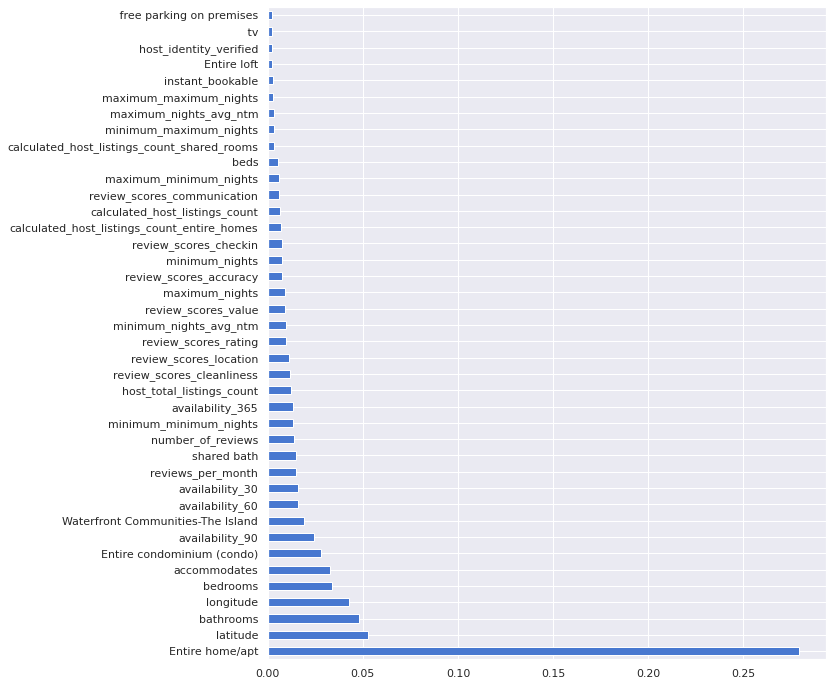

In [ ]:
# display the all features with the ratio of important
feat_imp = pd.Series(rf_l.feature_importances_, index = X_train.columns)
feat_imp.nlargest(40).plot(kind='barh', figsize=(10,12))

In [ ]:
coefs_df = pd.DataFrame()
# display the all features with the ratio of important
coefs_df['Features'] = X_train.columns
coefs_df['coefs'] = 100*(rf_l.feature_importances_)
coefs_df = coefs_df.sort_values('coefs', ascending=False).head(40)
coefs_df

,Features,coefs
101,Entire home/apt,27.932812
15,latitude,5.291943
18,bathrooms,4.815617
16,longitude,4.288636
19,bedrooms,3.392405
4,accommodates,3.267711
42,Entire condominium (condo),2.802981
8,availability_90,2.418361
227,Waterfront Communities-The Island,1.925637
7,availability_60,1.618056


In [ ]:
#select the important feature
imp_features = coefs_df['Features'][:30].values
imp_features

array(['Entire home/apt', 'latitude', 'bathrooms', 'longitude',
       'bedrooms', 'accommodates', 'Entire condominium (condo)',
       'availability_90', 'Waterfront Communities-The Island',
       'availability_60', 'availability_30', 'reviews_per_month',
       'shared bath', 'number_of_reviews', 'minimum_minimum_nights',
       'availability_365', 'host_total_listings_count',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_rating', 'minimum_nights_avg_ntm',
       'review_scores_value', 'maximum_nights', 'review_scores_accuracy',
       'minimum_nights', 'review_scores_checkin',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count', 'review_scores_communication',
       'maximum_minimum_nights'], dtype=object)

In [ ]:
# select the target and training features
X = listings_new[list(imp_features)]
Y = listings_new['price']

In [ ]:
#splite the data into Train and Test by 80% for training to 20% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .2, random_state = 42, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(9648, 21)
(2412, 21)
(9648,)
(2412,)


In [ ]:
#fit the model on the important feature 
rf_l.fit(xTrain, yTrain)
# make a prediction
y_train_pred = rf_l.predict(xTrain)
y_test_pred = rf_l.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Results of sklearn.metrics:
MAE: 26.672456781568346
MSE: 1306.3912224189362
RMSE: 36.144034395995924
R-Squared: 0.5787115393156105


> feature_names must be unique with Xgboost

In [ ]:
xTrain = xTrain.loc[:,~xTrain.columns.duplicated()]
xTest = xTest.loc[:,~xTest.columns.duplicated()]

> ### XGB

In [ ]:
#create a XGBRegressor model
xgb_cl = xgb.XGBRegressor()
#fit the model on the training data
xgb_cl.fit(xTrain, yTrain)
#make a prediction
y_train_pred = xgb_cl.predict(xTrain)
y_test_pred = xgb_cl.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

[00:27:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Results of sklearn.metrics:
MAE: 26.41989137165582
MSE: 1253.9019480978252
RMSE: 35.41047794223943
R-Squared: 0.5956384178813102


> ### DT

In [ ]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeRegressor(max_depth= 8 , min_samples_leaf= 2 , random_state= 3)
D_Tree.fit(xTrain , yTrain)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=2, random_state=3)

In [ ]:
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.5966758982365264


In [ ]:
y_train_pred_li = D_Tree.predict(xTrain)
y_test_pred_li = D_Tree.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 29.631153773556115
MSE: 1585.2760469849115
RMSE: 39.81552520041537
R-Squared: 0.48877603115130464


> ## <a> **predictive analysis Question**

>  ## Can we predict the price level of the listings after converting the prices to three levels(categories): low, medium, high. according to: ’prices that are less or equal to `25%` as (`low`), `25% to 75%` as (`medium`), and `75%` or higher as (`high`)’ ?

> ### Price To Category

> #### Create Price_category column

In [ ]:
#Create a method for create a price_category column
Q1 = listings_new['price'].quantile(0.25)
Q3 = listings_new['price'].quantile(0.75)

def price_category(x, Q1, Q3):
  if x <= Q1 : 
    return 'Low'
  elif x >= Q3:
    return 'High'
  else:
    return 'Medium'

In [ ]:
#apply the method on the price column to create a price category column
listings_new['price_category'] = listings_new['price'].apply(lambda x: price_category(x, Q1, Q3))

In [ ]:
# The number of the unique values
listings_new.price_category.unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [ ]:
# all unique values for price_category column
listings_new.price_category.value_counts()

Medium    6008
High      3031
Low       3021
Name: price_category, dtype: int64

> `0` for `Low`

> `1` for `Medium`

> `2` for `High`

>Create a Price_category column from price column

In [ ]:
# The number of the unique values
len(listings_new.price_category.value_counts())

3

In [ ]:
# the type of this column
listings_new['price_category'].dtypes

dtype('O')

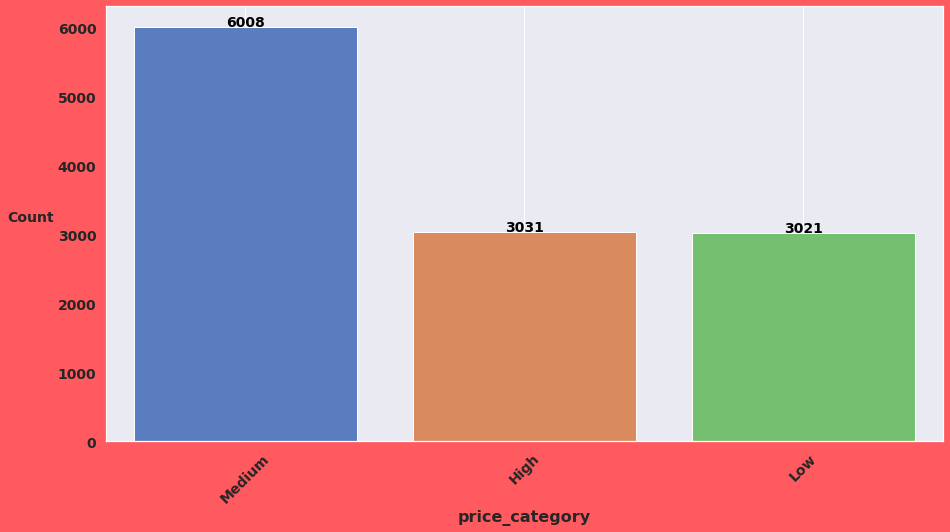

In [ ]:
# display the data distribution
dist_plot(listings_new.price_category,'price_category', 3)

In [ ]:
#convert the categorical values to numerical
def price_category_coding(x):
  if x == 'Low' : 
    return 0
  elif x == 'Medium':
    return 1
  else:
    return 2

In [ ]:
# calendar['price_category'] = calendar['price']
listings_new['price_category'] = listings_new['price_category'].apply(lambda x: price_category_coding(x))

In [ ]:
# The number of the unique values
listings_new.price_category.unique()

array([1, 0, 2])

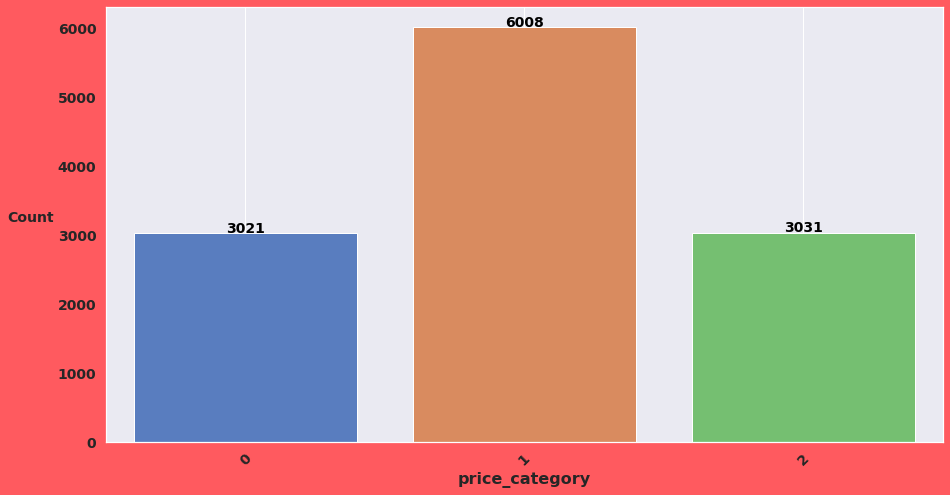

In [ ]:
# display the data distribution
dist_plot(listings_new.price_category,'price_category', 3)

> #### RandomForest

> ##### **Feature Selection**

In [ ]:
# remove any columns duplicates
listings_neww = listings_new.loc[:,~listings_new.columns.duplicated()]

In [ ]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
listings_neww.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in listings_neww.columns.values]


In [ ]:
%%time
#select the target column and the training set from the data set
y = listings_neww['price_category']
x = listings_neww.drop(['price', 'price_category'], axis =1)
# split the data into train and test to 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)
#create a RandomForestClassifier model
rf_li_class = RandomForestClassifier(n_estimators=500, random_state = 3, n_jobs=-1)

#fit the model on the training data
rf_li_class.fit(X_train, y_train)
#make a prediction
y_train_pred = rf_li_class.predict(X_train)
y_test_pred = rf_li_class.predict(X_test)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_test,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.30638474295190715
MSE: 0.31965174129353235
RMSE: 0.5653775210366365
R-Squared: 0.34219740812651434
CPU times: user 1min 1s, sys: 327 ms, total: 1min 2s
Wall time: 33.5 s


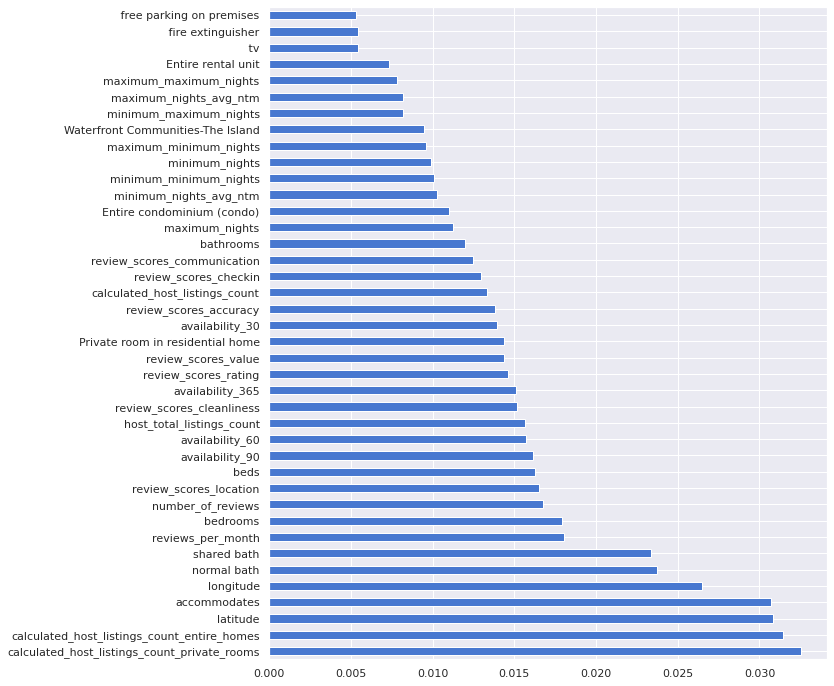

In [ ]:
# display the all features with the ratio of important
feat_imp = pd.Series(rf_li_class.feature_importances_, index = X_train.columns)
feat_imp.nlargest(40).plot(kind='barh', figsize=(10,12))

In [ ]:
coefs_df = pd.DataFrame()
# display the all features with the ratio of important
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = 100*(rf_li_class.feature_importances_)
coefs_df = coefs_df.sort_values('coefs', ascending=False)

In [ ]:
coefs_df.head(55)

,est_int,coefs
11,calculated_host_listings_count_private_rooms,3.251993
12,calculated_host_listings_count_entire_homes,3.142301
14,latitude,3.081122
4,accommodates,3.070687
15,longitude,2.650005
97,normal bath,2.373589
99,shared bath,2.336465
27,reviews_per_month,1.801488
18,bedrooms,1.792278
16,number_of_reviews,1.676290


In [ ]:
#select the important feature
imp_features = coefs_df['est_int'][:40].values
imp_features

array(['calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_entire_homes', 'latitude',
       'accommodates', 'longitude', 'normal bath', 'shared bath',
       'reviews_per_month', 'bedrooms', 'number_of_reviews',
       'review_scores_location', 'beds', 'availability_90',
       'availability_60', 'host_total_listings_count',
       'review_scores_cleanliness', 'availability_365',
       'review_scores_rating', 'review_scores_value',
       'Private room in residential home', 'availability_30',
       'review_scores_accuracy', 'calculated_host_listings_count',
       'review_scores_checkin', 'review_scores_communication',
       'bathrooms', 'maximum_nights', 'Entire condominium (condo)',
       'minimum_nights_avg_ntm', 'minimum_minimum_nights',
       'minimum_nights', 'maximum_minimum_nights',
       'Waterfront Communities-The Island', 'minimum_maximum_nights',
       'maximum_nights_avg_ntm', 'maximum_maximum_nights',
       'Entire rental unit',

> ##### **Training RandomForest Model**

In [ ]:
# select the target and training features
X = listings_neww[list(imp_features)]
Y = listings_neww['price_category']

In [ ]:
#splite the data into Train and Test by 80% for training to 20% for testing
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = .2, random_state = 42, shuffle = True)
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(9648, 45)
(2412, 45)
(9648,)
(2412,)


In [ ]:
#fit the model on the important feature 
rf_li_class.fit(xTrain, yTrain)
# make a prediction
y_train_pred_li = rf_li_class.predict(xTrain)
y_test_pred_li = rf_li_class.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.27860696517412936
MSE: 0.29270315091210614
RMSE: 0.5410204718050012
R-Squared: 0.4058754714887758


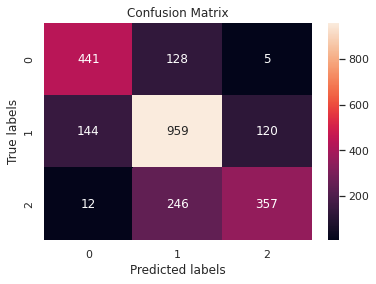

In [ ]:
#Calculating Prediction
yPred = rf_li_class.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.74      0.77      0.75       574
           1       0.72      0.78      0.75      1223
           2       0.74      0.58      0.65       615

    accuracy                           0.73      2412
   macro avg       0.73      0.71      0.72      2412
weighted avg       0.73      0.73      0.73      2412



> #### XGB

In [ ]:
#create a XGBClassifier model
xgb_reg = xgb.XGBClassifier()
#fit the model on the training data
xgb_reg.fit(xTrain, yTrain)
#make a prediction
y_train_pred = xgb_reg.predict(xTrain)
y_test_pred = xgb_reg.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred)
mse = metrics.mean_squared_error(yTest, y_test_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.28689883913764513
MSE: 0.3009950248756219
RMSE: 0.5486301348591981
R-Squared: 0.38904474830148894


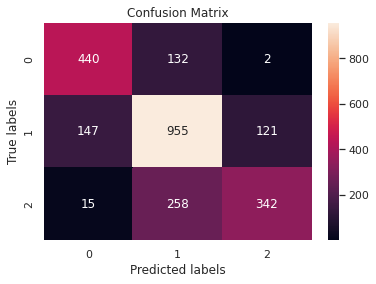

In [ ]:
#Calculating Prediction
yPred = xgb_reg.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       574
           1       0.71      0.78      0.74      1223
           2       0.74      0.56      0.63       615

    accuracy                           0.72      2412
   macro avg       0.73      0.70      0.71      2412
weighted avg       0.72      0.72      0.72      2412



> #### DT

In [ ]:
# create a decison tree model
D_Tree_model = DecisionTreeClassifier(random_state=3)
D_Tree_model.fit(xTrain , yTrain)

DecisionTreeClassifier(random_state=3)

In [ ]:
#GrideSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
k_range = list(i for i in range(1, 20))
get_grid_para = {"criterion" : ["gini" , "entropy"], "max_depth" : k_range, "min_samples_leaf": k_range}
grid_result = GridSearchCV(D_Tree_model , param_grid= get_grid_para , cv= 10, n_jobs= -1, scoring = 'accuracy')
grid_result.fit(xTrain, yTrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [ ]:
print(grid_result.best_params_, '  \n' , grid_result.best_estimator_ , '\n The Best Score : ' , grid_result.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2}   
 DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=3) 
 The Best Score :  0.6731959882183476


In [ ]:
#train the model with optimal hyperparameters
D_Tree = DecisionTreeClassifier(criterion= "gini", max_depth= 8 , min_samples_leaf= 2 , random_state= 3)
D_Tree.fit(xTrain , yTrain)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=3)

In [ ]:
print('D_Tree Train Score is : ' , D_Tree.score(xTrain, yTrain))

D_Tree Train Score is :  0.736318407960199


In [ ]:
#make a prediction
y_train_pred_li = D_Tree.predict(xTrain)
y_test_pred_li = D_Tree.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.33665008291873966
MSE: 0.3582089552238806
RMSE: 0.5985056016645798
R-Squared: 0.27291275830921


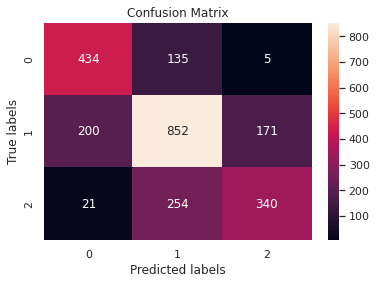

In [ ]:
#Calculating Prediction
yPred = D_Tree.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.66      0.76      0.71       574
           1       0.69      0.70      0.69      1223
           2       0.66      0.55      0.60       615

    accuracy                           0.67      2412
   macro avg       0.67      0.67      0.67      2412
weighted avg       0.67      0.67      0.67      2412



> #### LR

In [ ]:
#GrideSearchCV to find the optimal hyperparameters by fit alot of models with difrrent hyperparameters and chose the best one with high accuracy
%%capture
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.001,.009,0.01,.09,1,5,10,25, 1e5], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,  cv= 10 , n_jobs= -1,scoring = 'accuracy')
grid_clf_acc.fit(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
270 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25,
                               100000.0],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)
print(grid_clf_acc.best_estimator_)

0.6621062928643605
{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
LogisticRegression(C=10, solver='newton-cg')


In [ ]:
#train the model with optimal hyperparameters
%%capture
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 11, random_state=3, max_iter = 500)
LogisticRegressionModel.fit(xTrain, yTrain)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(C=11, max_iter=500, random_state=3, solver='newton-cg')

In [ ]:
#test the accuracy of model on training set
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(xTrain, yTrain))

LogisticRegressionModel Train Score is :  0.6766169154228856
----------------------------------------------------


In [ ]:
#make a prediction
y_train_pred_li = LogisticRegressionModel.predict(xTrain)
y_test_pred_li = LogisticRegressionModel.predict(xTest)

print("Results of sklearn.metrics:")
mae = metrics.mean_absolute_error(yTest, y_test_pred_li)
mse = metrics.mean_squared_error(yTest, y_test_pred_li)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(yTest,y_test_pred_li)

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.31550580431177444
MSE: 0.32960199004975127
RMSE: 0.574109736940379
R-Squared: 0.3309787533053494


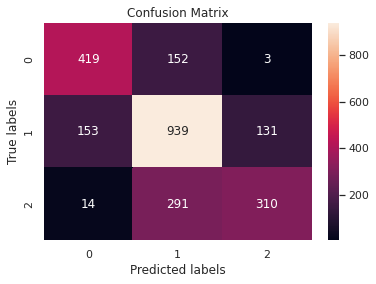

In [ ]:
#Calculating Prediction
yPred = LogisticRegressionModel.predict(xTest)

#----------------------------------------------------
#Calculating Confusion Matrix
CM = confusion_matrix(yTest, yPred)

# drawing confusion matrix
ax= plt.subplot()
sns.heatmap(CM, annot=True, fmt='g', ax = ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
#Calculating classification Report (precision, recall, f1-score, accuracy) on test set:  

ClassificationReport = classification_report(yTest, yPred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.72      0.73      0.72       574
           1       0.68      0.77      0.72      1223
           2       0.70      0.50      0.59       615

    accuracy                           0.69      2412
   macro avg       0.70      0.67      0.68      2412
weighted avg       0.69      0.69      0.69      2412

